In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [4]:
# Furniture Sales
df = pd.read_excel("../Data/Superstore.xls")
print (df.head())

furniture = df.loc[df['Category'] == 'Furniture']

print (furniture.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

In [ ]:
print (furniture.head())

In [5]:
print ("Min Date: ",furniture["Order Date"].min())
print ("Max Date: ",furniture["Order Date"].max())

Min Date:  2014-01-06 00:00:00
Max Date:  2017-12-30 00:00:00


In [8]:
#Basic Pre Processing

columns = furniture.columns
print (furniture.head())
# print (columns)
# print (furniture.shape)
# print (furniture.isnull().sum())

furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
# print (furniture.shape)
print (furniture.shape)

               Sales
Order Date          
2014-01-06  2573.820
2014-01-07    76.728
2014-01-10    51.940
2014-01-11     9.940
2014-01-13   879.939
(889, 1)


Order Date
2014-01-01    480.194231
2014-02-01    367.931600
2014-03-01    857.291529
2014-04-01    567.488357
2014-05-01    432.049187
Freq: MS, Name: Sales, dtype: float64


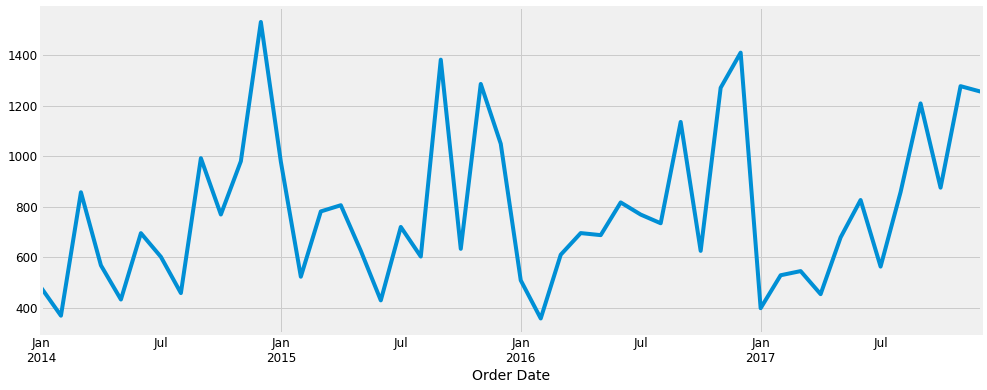

In [10]:
y = furniture["Sales"].resample("MS").mean()
print (y.head())
y.plot(figsize=(15,6))

Insight: Seasonality Data

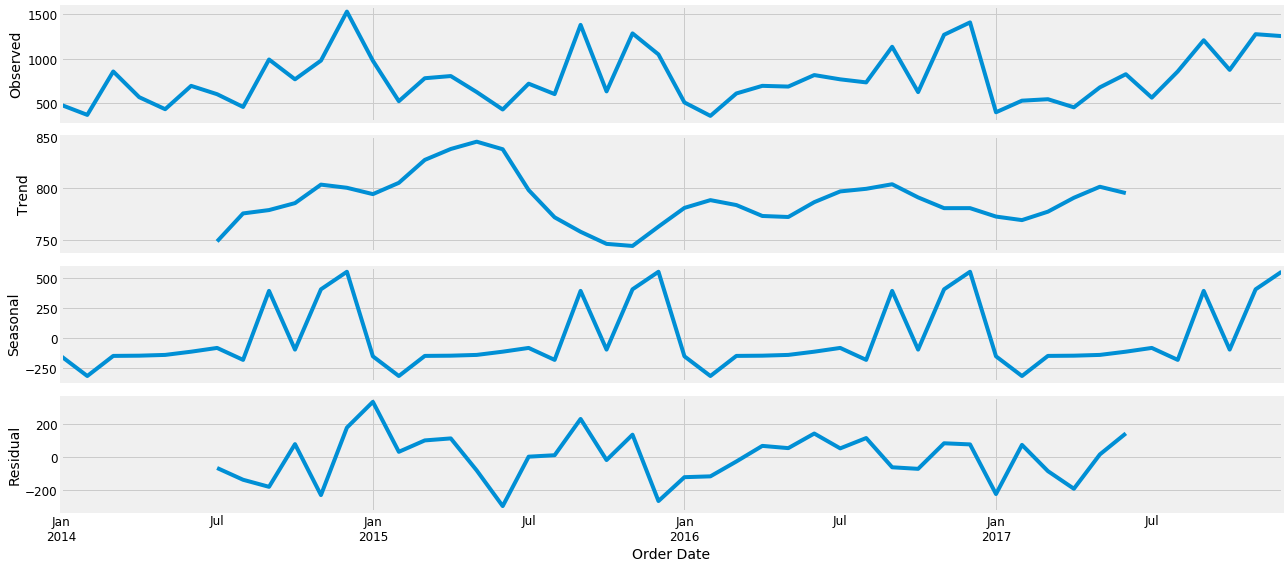

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 18,8

decom = sm.tsa.seasonal_decompose(y,model = "Additive")
fig = decom.plot()
plt.show()

Insight: Furniture Sales is Unstable with Seasonality

In [24]:
p = d = q = range(0, 5)
pdq = list(itertools.product(p, d, q))
print (pdq)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print (seasonal_pdq)

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 2, 4), (0, 3, 0), (0, 3, 1), (0, 3, 2), (0, 3, 3), (0, 3, 4), (0, 4, 0), (0, 4, 1), (0, 4, 2), (0, 4, 3), (0, 4, 4), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 2, 4), (1, 3, 0), (1, 3, 1), (1, 3, 2), (1, 3, 3), (1, 3, 4), (1, 4, 0), (1, 4, 1), (1, 4, 2), (1, 4, 3), (1, 4, 4), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 0, 4), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 2, 0), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 2, 4), (2, 3, 0), (2, 3, 1), (2, 3, 2), (2, 3, 3), (2, 3, 4), (2, 4, 0), (2, 4, 1), (2, 4, 2), (2, 4, 3), (2, 4, 4), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 0, 4), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 1, 4), (3, 2, 0), (3, 2, 1), (3, 2, 2), (3, 2, 3), (3, 2, 4), (3, 3, 0)

In [25]:
print (pdq)

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 2, 4), (0, 3, 0), (0, 3, 1), (0, 3, 2), (0, 3, 3), (0, 3, 4), (0, 4, 0), (0, 4, 1), (0, 4, 2), (0, 4, 3), (0, 4, 4), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 2, 4), (1, 3, 0), (1, 3, 1), (1, 3, 2), (1, 3, 3), (1, 3, 4), (1, 4, 0), (1, 4, 1), (1, 4, 2), (1, 4, 3), (1, 4, 4), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 0, 4), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 2, 0), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 2, 4), (2, 3, 0), (2, 3, 1), (2, 3, 2), (2, 3, 3), (2, 3, 4), (2, 4, 0), (2, 4, 1), (2, 4, 2), (2, 4, 3), (2, 4, 4), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 0, 4), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 1, 4), (3, 2, 0), (3, 2, 1), (3, 2, 2), (3, 2, 3), (3, 2, 4), (3, 3, 0)

In [26]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205916
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1576.7324642473277
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.71701309202774
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:336.9536604857689


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 3, 0, 12)12 - AIC:171.16297917391336
ARIMA(0, 0, 0)x(0, 4, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.23144334183365


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1478.1277236759956
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:162.12029487165506
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:319.96929434508735


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:947.5551469826491
ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:159.5144730671919


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(3, 0, 0, 12)12 - AIC:161.28400149263192


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(3, 0, 1, 12)12 - AIC:386.85738649032913
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758104
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2786.7230874852653
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091505
ARIMA(0, 0, 1)x(0, 2, 0, 12)12 - AIC:324.41357896753345
ARIMA(0, 0, 1)x(0, 3, 0, 12)12 - AIC:157.6453105659618
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.59412606125284
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2768.427220528199

C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.98848769468674
ARIMA(0, 0, 1)x(1, 2, 0, 12)12 - AIC:163.9883442811061
ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:321.96452770331217
ARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:933.955646397447
ARIMA(0, 0, 1)x(2, 1, 0, 12)12 - AIC:160.85410049250186
ARIMA(0, 0, 1)x(3, 0, 0, 12)12 - AIC:160.5988743257085
ARIMA(0, 0, 1)x(3, 0, 1, 12)12 - AIC:482.8438038880619
ARIMA(0, 0, 2)x(0, 0, 0, 12)12 - AIC:695.9854310935187


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(0, 0, 1, 12)12 - AIC:2673.901135340974
ARIMA(0, 0, 2)x(0, 1, 0, 12)12 - AIC:455.2093474618755
ARIMA(0, 0, 2)x(0, 2, 0, 12)12 - AIC:311.8417385725417
ARIMA(0, 0, 2)x(0, 3, 0, 12)12 - AIC:143.7545609994846
ARIMA(0, 0, 2)x(1, 0, 0, 12)12 - AIC:501.01287864382004

C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(0, 0, 2)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 2)x(1, 1, 0, 12)12 - AIC:321.88005844738643
ARIMA(0, 0, 2)x(1, 2, 0, 12)12 - AIC:164.1823760406321
ARIMA(0, 0, 2)x(2, 0, 0, 12)12 - AIC:323.58227595421715


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(2, 0, 1, 12)12 - AIC:951.2157247871435
ARIMA(0, 0, 2)x(2, 1, 0, 12)12 - AIC:163.57819530873059


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(3, 0, 0, 12)12 - AIC:165.66903163071643


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(3, 0, 1, 12)12 - AIC:455.5628836418471
ARIMA(0, 0, 3)x(0, 0, 0, 12)12 - AIC:671.173400459789
ARIMA(0, 0, 3)x(0, 0, 1, 12)12 - AIC:3058.5576575545583
ARIMA(0, 0, 3)x(0, 1, 0, 12)12 - AIC:442.88722307970056
ARIMA(0, 0, 3)x(0, 2, 0, 12)12 - AIC:292.9131418534206


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(0, 0, 3)x(1, 0, 0, 12)12 - AIC:501.813387822813
ARIMA(0, 0, 3)x(1, 0, 1, 12)12 - AIC:37064731.46462311
ARIMA(0, 0, 3)x(1, 1, 0, 12)12 - AIC:323.3655722236679


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 3)x(1, 2, 0, 12)12 - AIC:160.41212277111634
ARIMA(0, 0, 3)x(2, 0, 0, 12)12 - AIC:324.9625509206421
ARIMA(0, 0, 3)x(2, 0, 1, 12)12 - AIC:938.8778541564589
ARIMA(0, 0, 3)x(2, 1, 0, 12)12 - AIC:162.32415316050862


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 3)x(3, 0, 0, 12)12 - AIC:161.08589885541718


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 3)x(3, 0, 1, 12)12 - AIC:476.63896692049343
ARIMA(0, 0, 4)x(0, 0, 0, 12)12 - AIC:648.2823802725429
ARIMA(0, 0, 4)x(0, 0, 1, 12)12 - AIC:2674.2120379160406
ARIMA(0, 0, 4)x(0, 1, 0, 12)12 - AIC:426.91457357571375
ARIMA(0, 0, 4)x(0, 2, 0, 12)12 - AIC:280.9088885613252


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 4)x(1, 0, 0, 12)12 - AIC:503.45872333106354
ARIMA(0, 0, 4)x(1, 0, 1, 12)12 - AIC:2514.966394877131
ARIMA(0, 0, 4)x(1, 1, 0, 12)12 - AIC:319.23638152241176


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 4)x(1, 2, 0, 12)12 - AIC:159.87834802995525


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 4)x(2, 0, 0, 12)12 - AIC:329.0002548238879


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 4)x(2, 0, 1, 12)12 - AIC:903.2739523473223


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 4)x(2, 1, 0, 12)12 - AIC:160.0007153169632


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 4)x(3, 0, 0, 12)12 - AIC:170.94123583548827


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 4)x(3, 0, 1, 12)12 - AIC:494.7522428521477
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.894766843944


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1378.5486237111134
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.63785671879367
ARIMA(0, 1, 0)x(0, 2, 0, 12)12 - AIC:334.97781226395483
ARIMA(0, 1, 0)x(0, 3, 0, 12)12 - AIC:158.4812195658198
ARIMA(0, 1, 0)x(0, 4, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.78896630044073


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1022.8611228052164
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109211
ARIMA(0, 1, 0)x(1, 2, 0, 12)12 - AIC:152.42852106596337
ARIMA(0, 1, 0)x(2, 0, 0, 12)12 - AIC:317.69402237661177


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(2, 0, 1, 12)12 - AIC:943.8271320228372
ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:153.33829187964875
ARIMA(0, 1, 0)x(3, 0, 0, 12)12 - AIC:150.92269523125213


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(3, 0, 1, 12)12 - AIC:475.86565527850786
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.905617681726
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:3216.0197782079413
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.8705548482984
ARIMA(0, 1, 1)x(0, 2, 0, 12)12 - AIC:317.1957697239915
ARIMA(0, 1, 1)x(0, 3, 0, 12)12 - AIC:144.8932958068445
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.1832977442631


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2589.717123007444
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.7574368417452
ARIMA(0, 1, 1)x(1, 2, 0, 12)12 - AIC:154.41754102592117
ARIMA(0, 1, 1)x(2, 0, 0, 12)12 - AIC:311.85906742412305
ARIMA(0, 1, 1)x(2, 0, 1, 12)12 - AIC:949.7786979217994
ARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:149.57227369321595
ARIMA(0, 1, 1)x(3, 0, 0, 12)12 - AIC:151.14733618310905


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(3, 0, 1, 12)12 - AIC:502.0770996740499
ARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:634.8844283595672
ARIMA(0, 1, 2)x(0, 0, 1, 12)12 - AIC:2528.892023455931
ARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:447.5857396952682
ARIMA(0, 1, 2)x(0, 2, 0, 12)12 - AIC:305.03445359431305
ARIMA(0, 1, 2)x(0, 3, 0, 12)12 - AIC:131.5816906900991
ARIMA(0, 1, 2)x(1, 0, 0, 12)12 - AIC:487.4986912678718


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:310.73389307263176
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:154.697010343263
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:313.4823847170302


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:832.7700875232464
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:151.19056459672277
ARIMA(0, 1, 2)x(3, 0, 0, 12)12 - AIC:151.07590575766608


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(3, 0, 1, 12)12 - AIC:464.4585250820399
ARIMA(0, 1, 3)x(0, 0, 0, 12)12 - AIC:623.8908827504946
ARIMA(0, 1, 3)x(0, 0, 1, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 3)x(0, 1, 0, 12)12 - AIC:435.63547910308995
ARIMA(0, 1, 3)x(0, 2, 0, 12)12 - AIC:289.8317148985711


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(0, 1, 3)x(1, 0, 0, 12)12 - AIC:488.7886698857092
ARIMA(0, 1, 3)x(1, 0, 1, 12)12 - AIC:2436.6899514137367
ARIMA(0, 1, 3)x(1, 1, 0, 12)12 - AIC:311.3784705304848
ARIMA(0, 1, 3)x(1, 2, 0, 12)12 - AIC:153.1046366527998
ARIMA(0, 1, 3)x(2, 0, 0, 12)12 - AIC:315.0720156503399


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 3)x(2, 0, 1, 12)12 - AIC:1092.1798599084682
ARIMA(0, 1, 3)x(2, 1, 0, 12)12 - AIC:152.88160336174207


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 3)x(3, 0, 0, 12)12 - AIC:155.42834925037437


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 3)x(3, 0, 1, 12)12 - AIC:449.17663748911747
ARIMA(0, 1, 4)x(0, 0, 0, 12)12 - AIC:609.4034270589219
ARIMA(0, 1, 4)x(0, 0, 1, 12)12 - AIC:2372.5904740264814
ARIMA(0, 1, 4)x(0, 1, 0, 12)12 - AIC:420.1040344010331
ARIMA(0, 1, 4)x(0, 2, 0, 12)12 - AIC:268.06154462824907
ARIMA(0, 1, 4)x(1, 0, 0, 12)12 - AIC:490.5751335467391
ARIMA(0, 1, 4)x(1, 0, 1, 12)12 - AIC:2359.0374524117747
ARIMA(0, 1, 4)x(1, 1, 0, 12)12 - AIC:313.2853575616246


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 4)x(1, 2, 0, 12)12 - AIC:147.43893678595688
ARIMA(0, 1, 4)x(2, 0, 0, 12)12 - AIC:314.9261651784713


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 4)x(2, 0, 1, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 4)x(2, 1, 0, 12)12 - AIC:152.65009681738022
ARIMA(0, 1, 4)x(3, 0, 0, 12)12 - AIC:152.93531947781642
ARIMA(0, 1, 4)x(3, 0, 1, 12)12 - AIC:872.5072687644881
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:710.1125557214733


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:1282.1201847181405
ARIMA(0, 2, 0)x(0, 1, 0, 12)12 - AIC:509.89680954589835
ARIMA(0, 2, 0)x(0, 2, 0, 12)12 - AIC:342.9544199525339
ARIMA(0, 2, 0)x(0, 3, 0, 12)12 - AIC:146.73511337298146
ARIMA(0, 2, 0)x(0, 4, 0, 12)12 - AIC:2.0


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 0)x(1, 0, 0, 12)12 - AIC:520.887712617653
ARIMA(0, 2, 0)x(1, 0, 1, 12)12 - AIC:1377.687712082225
ARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:331.2504844685114
ARIMA(0, 2, 0)x(1, 2, 0, 12)12 - AIC:141.6839867329763
ARIMA(0, 2, 0)x(2, 0, 0, 12)12 - AIC:327.59550043149045

C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(0, 2, 0)x(2, 0, 1, 12)12 - AIC:870.7296292597399
ARIMA(0, 2, 0)x(2, 1, 0, 12)12 - AIC:143.5274498286222
ARIMA(0, 2, 0)x(3, 0, 0, 12)12 - AIC:143.82539641758316
ARIMA(0, 2, 0)x(3, 0, 1, 12)12 - AIC:145.8270741908762
ARIMA(0, 2, 1)x(0, 0, 0, 12)12 - AIC:652.8685965207615
ARIMA(0, 2, 1)x(0, 0, 1, 12)12 - AIC:2737.228394106218
ARIMA(0, 2, 1)x(0, 1, 0, 12)12 - AIC:463.0346544279314
ARIMA(0, 2, 1)x(0, 2, 0, 12)12 - AIC:310.32852239715925
ARIMA(0, 2, 1)x(0, 3, 0, 12)12 - AIC:128.98280134821943
ARIMA(0, 2, 1)x(1, 0, 0, 12)12 - AIC:489.9458560734389
ARIMA(0, 2, 1)x(1, 0, 1, 12)12 - AIC:2538.7954965069994
ARIMA(0, 2, 1)x(1, 1, 0, 12)12 - AIC:310.98647286926473
ARIMA(0, 2, 1)x(1, 2, 0, 12)12 - AIC:143.27935910501384
ARIMA(0, 2, 1)x(2, 0, 0, 12)12 - AIC:310.505624470936


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 1)x(2, 0, 1, 12)12 - AIC:1039.696750010187
ARIMA(0, 2, 1)x(2, 1, 0, 12)12 - AIC:142.2987308921793
ARIMA(0, 2, 1)x(3, 0, 0, 12)12 - AIC:141.45039303514545
ARIMA(0, 2, 1)x(3, 0, 1, 12)12 - AIC:142.2873273890629
ARIMA(0, 2, 2)x(0, 0, 0, 12)12 - AIC:628.8859101988204
ARIMA(0, 2, 2)x(0, 0, 1, 12)12 - AIC:2434.543764008046
ARIMA(0, 2, 2)x(0, 1, 0, 12)12 - AIC:440.18034423491514
ARIMA(0, 2, 2)x(0, 2, 0, 12)12 - AIC:294.7466797054799
ARIMA(0, 2, 2)x(0, 3, 0, 12)12 - AIC:120.94673233239752
ARIMA(0, 2, 2)x(1, 0, 0, 12)12 - AIC:482.90037026785023
ARIMA(0, 2, 2)x(1, 0, 1, 12)12 - AIC:2536.8082146412685
ARIMA(0, 2, 2)x(1, 1, 0, 12)12 - AIC:305.8984452688966
ARIMA(0, 2, 2)x(1, 2, 0, 12)12 - AIC:145.59346405576963
ARIMA(0, 2, 2)x(2, 0, 0, 12)12 - AIC:306.3280772163846


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 2)x(2, 0, 1, 12)12 - AIC:972.2832298113411


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 2)x(2, 1, 0, 12)12 - AIC:140.84551841861423
ARIMA(0, 2, 2)x(3, 0, 0, 12)12 - AIC:142.3574787975607
ARIMA(0, 2, 2)x(3, 0, 1, 12)12 - AIC:144.0371470929863
ARIMA(0, 2, 3)x(0, 0, 0, 12)12 - AIC:615.2911890078637
ARIMA(0, 2, 3)x(0, 0, 1, 12)12 - AIC:2357.032844680916
ARIMA(0, 2, 3)x(0, 1, 0, 12)12 - AIC:427.99542064624774
ARIMA(0, 2, 3)x(0, 2, 0, 12)12 - AIC:280.37685131490576


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(0, 2, 3)x(1, 0, 0, 12)12 - AIC:483.9613457936461
ARIMA(0, 2, 3)x(1, 0, 1, 12)12 - AIC:2381.816565819909
ARIMA(0, 2, 3)x(1, 1, 0, 12)12 - AIC:307.5933462713067
ARIMA(0, 2, 3)x(1, 2, 0, 12)12 - AIC:142.02634874601637


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 3)x(2, 0, 0, 12)12 - AIC:308.1914823140664


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 3)x(2, 0, 1, 12)12 - AIC:630.3294043956715


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 3)x(2, 1, 0, 12)12 - AIC:147.37642183950683


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 3)x(3, 0, 0, 12)12 - AIC:143.91335038698952


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 3)x(3, 0, 1, 12)12 - AIC:145.73240981227863
ARIMA(0, 2, 4)x(0, 0, 0, 12)12 - AIC:604.086512170696
ARIMA(0, 2, 4)x(0, 0, 1, 12)12 - AIC:2498.342984737176
ARIMA(0, 2, 4)x(0, 1, 0, 12)12 - AIC:413.4703498519029
ARIMA(0, 2, 4)x(0, 2, 0, 12)12 - AIC:257.38650955741247
ARIMA(0, 2, 4)x(1, 0, 0, 12)12 - AIC:484.9437750675407
ARIMA(0, 2, 4)x(1, 0, 1, 12)12 - AIC:2307.223221088415


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 4)x(1, 1, 0, 12)12 - AIC:309.09391703383267


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 4)x(1, 2, 0, 12)12 - AIC:134.16795992534657


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 4)x(2, 0, 0, 12)12 - AIC:310.0108933640318
ARIMA(0, 2, 4)x(2, 0, 1, 12)12 - AIC:1834.3758664973966


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 4)x(2, 1, 0, 12)12 - AIC:140.80611634518175


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 4)x(3, 0, 0, 12)12 - AIC:143.63617128549407


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 4)x(3, 0, 1, 12)12 - AIC:144.2152024210058
ARIMA(0, 3, 0)x(0, 0, 0, 12)12 - AIC:745.5554303473486


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 3, 0)x(0, 0, 1, 12)12 - AIC:796.509606202759
ARIMA(0, 3, 0)x(0, 1, 0, 12)12 - AIC:534.8613860679567
ARIMA(0, 3, 0)x(0, 2, 0, 12)12 - AIC:352.94134909259463
ARIMA(0, 3, 0)x(0, 3, 0, 12)12 - AIC:136.76026448485663
ARIMA(0, 3, 0)x(0, 4, 0, 12)12 - AIC:2.0
ARIMA(0, 3, 0)x(1, 0, 0, 12)12 - AIC:546.8430293571547


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 3, 0)x(1, 0, 1, 12)12 - AIC:1171.846432493917
ARIMA(0, 3, 0)x(1, 1, 0, 12)12 - AIC:343.12053344813035
ARIMA(0, 3, 0)x(1, 2, 0, 12)12 - AIC:134.94893010967218
ARIMA(0, 3, 0)x(2, 0, 0, 12)12 - AIC:338.3119791291935


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 3, 0)x(2, 0, 1, 12)12 - AIC:841.0327300028855
ARIMA(0, 3, 0)x(2, 1, 0, 12)12 - AIC:136.53974766018055
ARIMA(0, 3, 0)x(3, 0, 0, 12)12 - AIC:137.36238615910824


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 3, 0)x(3, 0, 1, 12)12 - AIC:249.3307672753568
ARIMA(0, 3, 1)x(0, 0, 0, 12)12 - AIC:683.5867387045279
ARIMA(0, 3, 1)x(0, 0, 1, 12)12 - AIC:2436.350150469353
ARIMA(0, 3, 1)x(0, 1, 0, 12)12 - AIC:483.7629821032549
ARIMA(0, 3, 1)x(0, 2, 0, 12)12 - AIC:315.2758242977539
ARIMA(0, 3, 1)x(0, 3, 0, 12)12 - AIC:116.16363288078132
ARIMA(0, 3, 1)x(1, 0, 0, 12)12 - AIC:510.9067814791963
ARIMA(0, 3, 1)x(1, 0, 1, 12)12 - AIC:2815.4436606714644
ARIMA(0, 3, 1)x(1, 1, 0, 12)12 - AIC:320.43208972945155
ARIMA(0, 3, 1)x(1, 2, 0, 12)12 - AIC:130.40585829361675
ARIMA(0, 3, 1)x(2, 0, 0, 12)12 - AIC:317.8624422408595
ARIMA(0, 3, 1)x(2, 0, 1, 12)12 - AIC:1711.9404219594603
ARIMA(0, 3, 1)x(2, 1, 0, 12)12 - AIC:131.4592785373898
ARIMA(0, 3, 1)x(3, 0, 0, 12)12 - AIC:133.0211987579903


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 3, 1)x(3, 0, 1, 12)12 - AIC:704.5239229395604
ARIMA(0, 3, 2)x(0, 0, 0, 12)12 - AIC:631.3498326716079


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 3, 2)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 3, 2)x(0, 1, 0, 12)12 - AIC:440.6332263980778
ARIMA(0, 3, 2)x(0, 2, 0, 12)12 - AIC:284.82708580412344
ARIMA(0, 3, 2)x(0, 3, 0, 12)12 - AIC:116.6305419746597
ARIMA(0, 3, 2)x(1, 0, 0, 12)12 - AIC:483.81766751698984
ARIMA(0, 3, 2)x(1, 0, 1, 12)12 - AIC:2544.843523630606
ARIMA(0, 3, 2)x(1, 1, 0, 12)12 - AIC:302.31454701354176


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 3, 2)x(1, 2, 0, 12)12 - AIC:133.13206412139127
ARIMA(0, 3, 2)x(2, 0, 0, 12)12 - AIC:302.10646282413126


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 3, 2)x(2, 0, 1, 12)12 - AIC:724.089802577126


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 3, 2)x(2, 1, 0, 12)12 - AIC:131.46404492468778
ARIMA(0, 3, 2)x(3, 0, 0, 12)12 - AIC:134.5877710308992


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 3, 2)x(3, 0, 1, 12)12 - AIC:304.7844316792316
ARIMA(0, 3, 3)x(0, 0, 0, 12)12 - AIC:626.5239952596353
ARIMA(0, 3, 3)x(0, 0, 1, 12)12 - AIC:2142.329222105529
ARIMA(0, 3, 3)x(0, 1, 0, 12)12 - AIC:420.23947865286823


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 3, 3)x(0, 2, 0, 12)12 - AIC:267.17457491119717


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 3, 3)x(1, 0, 0, 12)12 - AIC:479.40651303935107
ARIMA(0, 3, 3)x(1, 0, 1, 12)12 - AIC:2246.3259386373475


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 3, 3)x(1, 1, 0, 12)12 - AIC:310.8002686374874


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 3, 3)x(1, 2, 0, 12)12 - AIC:129.74839060821603
ARIMA(0, 3, 3)x(2, 0, 0, 12)12 - AIC:301.47079300129707
ARIMA(0, 3, 3)x(2, 0, 1, 12)12 - AIC:2419.52192978114


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 3, 3)x(2, 1, 0, 12)12 - AIC:132.02446799451243
ARIMA(0, 3, 3)x(3, 0, 0, 12)12 - AIC:134.13522039830235


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 3, 3)x(3, 0, 1, 12)12 - AIC:705.8770635895032


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 3, 4)x(0, 0, 0, 12)12 - AIC:598.0851189580267
ARIMA(0, 3, 4)x(0, 0, 1, 12)12 - AIC:2071.424071711937


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 3, 4)x(0, 1, 0, 12)12 - AIC:408.41760469915465
ARIMA(0, 3, 4)x(0, 2, 0, 12)12 - AIC:251.8495357888788


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 3, 4)x(1, 0, 0, 12)12 - AIC:481.33501848832617
ARIMA(0, 3, 4)x(1, 0, 1, 12)12 - AIC:2171.8675276568247


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 3, 4)x(1, 1, 0, 12)12 - AIC:316.6598031169298


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 3, 4)x(1, 2, 0, 12)12 - AIC:128.83613290993594


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 3, 4)x(2, 0, 0, 12)12 - AIC:303.5381383085995
ARIMA(0, 3, 4)x(2, 0, 1, 12)12 - AIC:1629.5869842577972


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 3, 4)x(2, 1, 0, 12)12 - AIC:143.09000522137725


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 3, 4)x(3, 0, 0, 12)12 - AIC:134.33834819474177
ARIMA(0, 3, 4)x(3, 0, 1, 12)12 - AIC:742.3850944928736
ARIMA(0, 4, 0)x(0, 0, 0, 12)12 - AIC:780.7495382857645


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 4, 0)x(0, 0, 1, 12)12 - AIC:1222.6088074662591
ARIMA(0, 4, 0)x(0, 1, 0, 12)12 - AIC:558.6533754430134
ARIMA(0, 4, 0)x(0, 2, 0, 12)12 - AIC:361.38414646540133
ARIMA(0, 4, 0)x(0, 3, 0, 12)12 - AIC:127.95877814091642
ARIMA(0, 4, 0)x(0, 4, 0, 12)12 - AIC:2.0
ARIMA(0, 4, 0)x(1, 0, 0, 12)12 - AIC:572.1052345156471


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 4, 0)x(1, 0, 1, 12)12 - AIC:931.1730733885273
ARIMA(0, 4, 0)x(1, 1, 0, 12)12 - AIC:352.95619947330675
ARIMA(0, 4, 0)x(1, 2, 0, 12)12 - AIC:129.64091203963906
ARIMA(0, 4, 0)x(2, 0, 0, 12)12 - AIC:347.3555286020661


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 4, 0)x(2, 0, 1, 12)12 - AIC:735.5199278614142
ARIMA(0, 4, 0)x(2, 1, 0, 12)12 - AIC:130.71543353485626


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 4, 0)x(3, 0, 0, 12)12 - AIC:131.66317833132078
ARIMA(0, 4, 0)x(3, 0, 1, 12)12 - AIC:323.22645295636846
ARIMA(0, 4, 1)x(0, 0, 0, 12)12 - AIC:717.3910796166267
ARIMA(0, 4, 1)x(0, 0, 1, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 4, 1)x(0, 1, 0, 12)12 - AIC:506.5087636839154
ARIMA(0, 4, 1)x(0, 2, 0, 12)12 - AIC:329.77636042189096
ARIMA(0, 4, 1)x(0, 3, 0, 12)12 - AIC:106.27339323093918
ARIMA(0, 4, 1)x(1, 0, 0, 12)12 - AIC:535.4685312958663
ARIMA(0, 4, 1)x(1, 0, 1, 12)12 - AIC:2355.881489978213


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 4, 1)x(1, 1, 0, 12)12 - AIC:330.83457017675636
ARIMA(0, 4, 1)x(1, 2, 0, 12)12 - AIC:123.59777747079747
ARIMA(0, 4, 1)x(2, 0, 0, 12)12 - AIC:327.1251632171332
ARIMA(0, 4, 1)x(2, 0, 1, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 4, 1)x(2, 1, 0, 12)12 - AIC:124.46572725685465
ARIMA(0, 4, 1)x(3, 0, 0, 12)12 - AIC:126.74052223765293
ARIMA(0, 4, 1)x(3, 0, 1, 12)12 - AIC:636.1600710444243
ARIMA(0, 4, 2)x(0, 0, 0, 12)12 - AIC:659.0023807193973
ARIMA(0, 4, 2)x(0, 0, 1, 12)12 - AIC:2289.300377804884
ARIMA(0, 4, 2)x(0, 1, 0, 12)12 - AIC:457.1540873182681
ARIMA(0, 4, 2)x(0, 2, 0, 12)12 - AIC:285.5855214043408


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 4, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(0, 4, 2)x(1, 0, 0, 12)12 - AIC:502.9046925893523
ARIMA(0, 4, 2)x(1, 0, 1, 12)12 - AIC:2489.1702847862384
ARIMA(0, 4, 2)x(1, 1, 0, 12)12 - AIC:310.7959003977561


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 4, 2)x(1, 2, 0, 12)12 - AIC:126.1472736021297
ARIMA(0, 4, 2)x(2, 0, 0, 12)12 - AIC:308.7978049073874


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 4, 2)x(2, 0, 1, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 4, 2)x(2, 1, 0, 12)12 - AIC:121.54415152542784


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 4, 2)x(3, 0, 0, 12)12 - AIC:127.78524432316249
ARIMA(0, 4, 2)x(3, 0, 1, 12)12 - AIC:635.6456727977152


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 4, 3)x(0, 0, 0, 12)12 - AIC:611.8493925742139
ARIMA(0, 4, 3)x(0, 0, 1, 12)12 - AIC:2204.280427601128


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 4, 3)x(0, 1, 0, 12)12 - AIC:419.05501018520613


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 4, 3)x(0, 2, 0, 12)12 - AIC:259.5206258180286


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 4, 3)x(1, 0, 0, 12)12 - AIC:481.25318960460527
ARIMA(0, 4, 3)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(0, 4, 3)x(1, 1, 0, 12)12 - AIC:328.0898510252656


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 4, 3)x(1, 2, 0, 12)12 - AIC:117.45330058394262


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 4, 3)x(2, 0, 0, 12)12 - AIC:298.61694685246925
ARIMA(0, 4, 3)x(2, 0, 1, 12)12 - AIC:1542.6532336851453

C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 4, 3)x(2, 1, 0, 12)12 - AIC:138.7950671976967


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 4, 3)x(3, 0, 0, 12)12 - AIC:124.80373785379948


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 4, 3)x(3, 0, 1, 12)12 - AIC:634.2256308990171
ARIMA(0, 4, 4)x(0, 0, 0, 12)12 - AIC:622.9506917905566


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 4, 4)x(0, 0, 1, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 4, 4)x(0, 1, 0, 12)12 - AIC:402.2411525841862
ARIMA(0, 4, 4)x(0, 2, 0, 12)12 - AIC:245.18423387001187


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 4, 4)x(1, 0, 0, 12)12 - AIC:510.58996893728175
ARIMA(0, 4, 4)x(1, 0, 1, 12)12 - AIC:2111.714336256641
ARIMA(0, 4, 4)x(1, 1, 0, 12)12 - AIC:319.084746426283


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 4, 4)x(1, 2, 0, 12)12 - AIC:129.49705697377425


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 4, 4)x(2, 0, 0, 12)12 - AIC:324.86646016939693


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 4, 4)x(2, 0, 1, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 4, 4)x(2, 1, 0, 12)12 - AIC:136.26447885033713


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 4, 4)x(3, 0, 0, 12)12 - AIC:136.30876166297972


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 4, 4)x(3, 0, 1, 12)12 - AIC:nan
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067713


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1450.0255396955233
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.46321478521355
ARIMA(1, 0, 0)x(0, 2, 0, 12)12 - AIC:338.22248101866853
ARIMA(1, 0, 0)x(0, 3, 0, 12)12 - AIC:172.60445806987718
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.92593679351836


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1352.209230823926
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.46646750845986
ARIMA(1, 0, 0)x(1, 2, 0, 12)12 - AIC:151.3882036756357
ARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:306.4639496842725
ARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:900.2962138926732
ARIMA(1, 0, 0)x(2, 1, 0, 12)12 - AIC:148.4712914908443


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(3, 0, 0, 12)12 - AIC:150.72093126645478


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(3, 0, 1, 12)12 - AIC:513.1100719131033
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.779444218529
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2688.1953106578308
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.3685195814159
ARIMA(1, 0, 1)x(0, 2, 0, 12)12 - AIC:326.36049011937195
ARIMA(1, 0, 1)x(0, 3, 0, 12)12 - AIC:158.7770563894117
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.57633238765646


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.01560022074426
ARIMA(1, 0, 1)x(1, 2, 0, 12)12 - AIC:153.6678902963528
ARIMA(1, 0, 1)x(2, 0, 0, 12)12 - AIC:309.7096567885557


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(2, 0, 1, 12)12 - AIC:970.3068218579133
ARIMA(1, 0, 1)x(2, 1, 0, 12)12 - AIC:148.64415338909998
ARIMA(1, 0, 1)x(3, 0, 0, 12)12 - AIC:150.54072528444752


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(3, 0, 1, 12)12 - AIC:472.77332824323133
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:652.5371565503973
ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:3316.217771673509
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:454.51625971597366
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:311.968668826082
ARIMA(1, 0, 2)x(0, 3, 0, 12)12 - AIC:143.34182287382043
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:483.94357961702985
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:14526.364123137688
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:305.8460722901492


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:153.23892107158508
ARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:309.0066800987395


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(2, 0, 1, 12)12 - AIC:847.6862092631185
ARIMA(1, 0, 2)x(2, 1, 0, 12)12 - AIC:150.64208002546943


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(3, 0, 0, 12)12 - AIC:155.60098940753116


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(3, 0, 1, 12)12 - AIC:425.40757554167124
ARIMA(1, 0, 3)x(0, 0, 0, 12)12 - AIC:638.8193802733127
ARIMA(1, 0, 3)x(0, 0, 1, 12)12 - AIC:2534.868158720179
ARIMA(1, 0, 3)x(0, 1, 0, 12)12 - AIC:441.4386150137511
ARIMA(1, 0, 3)x(0, 2, 0, 12)12 - AIC:294.53325720349744


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(1, 0, 3)x(1, 0, 0, 12)12 - AIC:481.416458569812
ARIMA(1, 0, 3)x(1, 0, 1, 12)12 - AIC:2415.2257920623942
ARIMA(1, 0, 3)x(1, 1, 0, 12)12 - AIC:305.75700718513974
ARIMA(1, 0, 3)x(1, 2, 0, 12)12 - AIC:152.92251458617946


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 3)x(2, 0, 0, 12)12 - AIC:308.5356426675913


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 3)x(2, 0, 1, 12)12 - AIC:686.0130568214536


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 3)x(2, 1, 0, 12)12 - AIC:151.86389317934083


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 3)x(3, 0, 0, 12)12 - AIC:148.73651222949348


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 3)x(3, 0, 1, 12)12 - AIC:380.41517803324416


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 4)x(0, 0, 0, 12)12 - AIC:624.8900498791885
ARIMA(1, 0, 4)x(0, 0, 1, 12)12 - AIC:2535.894543642578
ARIMA(1, 0, 4)x(0, 1, 0, 12)12 - AIC:427.66037031468215
ARIMA(1, 0, 4)x(0, 2, 0, 12)12 - AIC:282.3158365735751


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 4)x(1, 0, 0, 12)12 - AIC:482.3911491351339
ARIMA(1, 0, 4)x(1, 0, 1, 12)12 - AIC:2339.227296662565
ARIMA(1, 0, 4)x(1, 1, 0, 12)12 - AIC:305.45997124247964


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 4)x(1, 2, 0, 12)12 - AIC:148.14849105669572


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 4)x(2, 0, 0, 12)12 - AIC:311.8909202029077


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 4)x(2, 0, 1, 12)12 - AIC:917.0809727212137


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 4)x(2, 1, 0, 12)12 - AIC:149.0473803536393


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 4)x(3, 0, 0, 12)12 - AIC:146.0075321461512
ARIMA(1, 0, 4)x(3, 0, 1, 12)12 - AIC:450.2079514491426
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541902


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1455.1241321469415
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.20034222811347
ARIMA(1, 1, 0)x(0, 2, 0, 12)12 - AIC:332.3956597623958
ARIMA(1, 1, 0)x(0, 3, 0, 12)12 - AIC:160.13781777650976
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.34036587849016


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1356.0287228411075
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.62709013453934
ARIMA(1, 1, 0)x(1, 2, 0, 12)12 - AIC:140.97940432821764
ARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:301.7688524289619
ARIMA(1, 1, 0)x(2, 0, 1, 12)12 - AIC:886.213014286266
ARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:141.03361172495747
ARIMA(1, 1, 0)x(3, 0, 0, 12)12 - AIC:139.56015705995074


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(3, 0, 1, 12)12 - AIC:385.76026235338554
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:649.0318019835137
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:21749.90908195544
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.4762687610251
ARIMA(1, 1, 1)x(0, 2, 0, 12)12 - AIC:317.9907754347548
ARIMA(1, 1, 1)x(0, 3, 0, 12)12 - AIC:145.6479581321129
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.5250354660837


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2592.9586233250657
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.787543953291
ARIMA(1, 1, 1)x(1, 2, 0, 12)12 - AIC:139.89884389583094
ARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC:304.81353214544805
ARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:906.7132027171776
ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:138.3371436517947
ARIMA(1, 1, 1)x(3, 0, 0, 12)12 - AIC:140.13404516860183


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(3, 0, 1, 12)12 - AIC:418.392760159868
ARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:636.879037789156


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC:2531.686163553278
ARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:449.4788858975254
ARIMA(1, 1, 2)x(0, 2, 0, 12)12 - AIC:305.7151397158988
ARIMA(1, 1, 2)x(0, 3, 0, 12)12 - AIC:130.84184234934705
ARIMA(1, 1, 2)x(1, 0, 0, 12)12 - AIC:471.05557651078493
ARIMA(1, 1, 2)x(1, 0, 1, 12)12 - AIC:318581.8189480535


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:299.7782955899802
ARIMA(1, 1, 2)x(1, 2, 0, 12)12 - AIC:142.46380187458877
ARIMA(1, 1, 2)x(2, 0, 0, 12)12 - AIC:302.2177681326379
ARIMA(1, 1, 2)x(2, 0, 1, 12)12 - AIC:943.6340092545527


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:140.72610687987165
ARIMA(1, 1, 2)x(3, 0, 0, 12)12 - AIC:139.25523346592917


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(3, 0, 1, 12)12 - AIC:439.4499321441072
ARIMA(1, 1, 3)x(0, 0, 0, 12)12 - AIC:625.2677926144834
ARIMA(1, 1, 3)x(0, 0, 1, 12)12 - AIC:2451.298184750869
ARIMA(1, 1, 3)x(0, 1, 0, 12)12 - AIC:437.23044704779846
ARIMA(1, 1, 3)x(0, 2, 0, 12)12 - AIC:288.840528693791


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(1, 1, 3)x(1, 0, 0, 12)12 - AIC:475.0894592042276
ARIMA(1, 1, 3)x(1, 0, 1, 12)12 - AIC:351653.8636613662


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 3)x(1, 1, 0, 12)12 - AIC:300.88110914814365
ARIMA(1, 1, 3)x(1, 2, 0, 12)12 - AIC:139.16762144322664
ARIMA(1, 1, 3)x(2, 0, 0, 12)12 - AIC:305.25433342054316


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 3)x(2, 0, 1, 12)12 - AIC:947.075274427534


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 3)x(2, 1, 0, 12)12 - AIC:137.105900111886


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 3)x(3, 0, 0, 12)12 - AIC:145.87792030096915
ARIMA(1, 1, 3)x(3, 0, 1, 12)12 - AIC:441.5749395153001
ARIMA(1, 1, 4)x(0, 0, 0, 12)12 - AIC:611.4015046065201
ARIMA(1, 1, 4)x(0, 0, 1, 12)12 - AIC:2373.4165268801107
ARIMA(1, 1, 4)x(0, 1, 0, 12)12 - AIC:421.69845038527313
ARIMA(1, 1, 4)x(0, 2, 0, 12)12 - AIC:269.66597747826864


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 4)x(1, 0, 0, 12)12 - AIC:473.9014144890762


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 4)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(1, 1, 4)x(1, 1, 0, 12)12 - AIC:302.7921381470384


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 4)x(1, 2, 0, 12)12 - AIC:132.2164737391773


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 4)x(2, 0, 0, 12)12 - AIC:305.16606453155947
ARIMA(1, 1, 4)x(2, 0, 1, 12)12 - AIC:902.5639895258965


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 4)x(2, 1, 0, 12)12 - AIC:141.90944030387465


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 4)x(3, 0, 0, 12)12 - AIC:139.10803671671295


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 4)x(3, 0, 1, 12)12 - AIC:438.33912610746523
ARIMA(1, 2, 0)x(0, 0, 0, 12)12 - AIC:691.2298181871188


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 0)x(0, 0, 1, 12)12 - AIC:1262.1772434241075
ARIMA(1, 2, 0)x(0, 1, 0, 12)12 - AIC:487.7254958276131
ARIMA(1, 2, 0)x(0, 2, 0, 12)12 - AIC:326.75644156583337
ARIMA(1, 2, 0)x(0, 3, 0, 12)12 - AIC:144.83081152201217
ARIMA(1, 2, 0)x(1, 0, 0, 12)12 - AIC:485.7746885900551
ARIMA(1, 2, 0)x(1, 0, 1, 12)12 - AIC:1874.598521804568
ARIMA(1, 2, 0)x(1, 1, 0, 12)12 - AIC:302.0552143225406
ARIMA(1, 2, 0)x(1, 2, 0, 12)12 - AIC:129.59004245503675
ARIMA(1, 2, 0)x(2, 0, 0, 12)12 - AIC:303.83852169143944


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 0)x(2, 0, 1, 12)12 - AIC:1023.4894063174896
ARIMA(1, 2, 0)x(2, 1, 0, 12)12 - AIC:130.8650268397722
ARIMA(1, 2, 0)x(3, 0, 0, 12)12 - AIC:131.75367348806037
ARIMA(1, 2, 0)x(3, 0, 1, 12)12 - AIC:133.75367349334363
ARIMA(1, 2, 1)x(0, 0, 0, 12)12 - AIC:647.5183048786594
ARIMA(1, 2, 1)x(0, 0, 1, 12)12 - AIC:2511.361582219649
ARIMA(1, 2, 1)x(0, 1, 0, 12)12 - AIC:455.9868411970348
ARIMA(1, 2, 1)x(0, 2, 0, 12)12 - AIC:308.33975356016214
ARIMA(1, 2, 1)x(0, 3, 0, 12)12 - AIC:130.9806850951298
ARIMA(1, 2, 1)x(1, 0, 0, 12)12 - AIC:470.8350262821555
ARIMA(1, 2, 1)x(1, 0, 1, 12)12 - AIC:2538.518063508056
ARIMA(1, 2, 1)x(1, 1, 0, 12)12 - AIC:293.0917446828796
ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:128.46456185371835
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:293.76780130293224


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:1021.5405588013098
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:130.67250513582985
ARIMA(1, 2, 1)x(3, 0, 0, 12)12 - AIC:131.93246178752466
ARIMA(1, 2, 1)x(3, 0, 1, 12)12 - AIC:133.70812324260925


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:629.3897470297312
ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:2435.9805178351353
ARIMA(1, 2, 2)x(0, 1, 0, 12)12 - AIC:442.08163418064703
ARIMA(1, 2, 2)x(0, 2, 0, 12)12 - AIC:294.5627826458912
ARIMA(1, 2, 2)x(0, 3, 0, 12)12 - AIC:117.65482675846428
ARIMA(1, 2, 2)x(1, 0, 0, 12)12 - AIC:470.59316760740876
ARIMA(1, 2, 2)x(1, 0, 1, 12)12 - AIC:2461.562235187847
ARIMA(1, 2, 2)x(1, 1, 0, 12)12 - AIC:293.3465954552844
ARIMA(1, 2, 2)x(1, 2, 0, 12)12 - AIC:127.9594803140024
ARIMA(1, 2, 2)x(2, 0, 0, 12)12 - AIC:294.002914137007


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(2, 0, 1, 12)12 - AIC:1012.1753236813427
ARIMA(1, 2, 2)x(2, 1, 0, 12)12 - AIC:129.61643099278243
ARIMA(1, 2, 2)x(3, 0, 0, 12)12 - AIC:129.44010753541502


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(3, 0, 1, 12)12 - AIC:131.1183528695102


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 3)x(0, 0, 0, 12)12 - AIC:617.0102390958256
ARIMA(1, 2, 3)x(0, 0, 1, 12)12 - AIC:2355.89236125546
ARIMA(1, 2, 3)x(0, 1, 0, 12)12 - AIC:429.6498974122272
ARIMA(1, 2, 3)x(0, 2, 0, 12)12 - AIC:282.8882065153094


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(1, 2, 3)x(1, 0, 0, 12)12 - AIC:473.00781090391547
ARIMA(1, 2, 3)x(1, 0, 1, 12)12 - AIC:2782.16179974743
ARIMA(1, 2, 3)x(1, 1, 0, 12)12 - AIC:295.33705549596345
ARIMA(1, 2, 3)x(1, 2, 0, 12)12 - AIC:128.5437813597785
ARIMA(1, 2, 3)x(2, 0, 0, 12)12 - AIC:295.9966019487511


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 3)x(2, 0, 1, 12)12 - AIC:843.2136002435612


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 3)x(2, 1, 0, 12)12 - AIC:131.45018125916232


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 3)x(3, 0, 0, 12)12 - AIC:131.19411772566332


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 3)x(3, 0, 1, 12)12 - AIC:131.47459791890236


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 4)x(0, 0, 0, 12)12 - AIC:604.544131960698
ARIMA(1, 2, 4)x(0, 0, 1, 12)12 - AIC:2283.511991351993
ARIMA(1, 2, 4)x(0, 1, 0, 12)12 - AIC:414.60727755714066
ARIMA(1, 2, 4)x(0, 2, 0, 12)12 - AIC:259.93798584248725
ARIMA(1, 2, 4)x(1, 0, 0, 12)12 - AIC:472.83564257159543
ARIMA(1, 2, 4)x(1, 0, 1, 12)12 - AIC:2382.5018989720074
ARIMA(1, 2, 4)x(1, 1, 0, 12)12 - AIC:298.38079130795575


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 4)x(1, 2, 0, 12)12 - AIC:116.5144523546318


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 4)x(2, 0, 0, 12)12 - AIC:298.33276923467355


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 4)x(2, 0, 1, 12)12 - AIC:873.240264985158


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 4)x(2, 1, 0, 12)12 - AIC:131.47501438557794


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 4)x(3, 0, 0, 12)12 - AIC:132.88628999422306


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 4)x(3, 0, 1, 12)12 - AIC:136.13242888493733
ARIMA(1, 3, 0)x(0, 0, 0, 12)12 - AIC:720.2158001691707


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 3, 0)x(0, 0, 1, 12)12 - AIC:1155.531393628788
ARIMA(1, 3, 0)x(0, 1, 0, 12)12 - AIC:501.86644077427303
ARIMA(1, 3, 0)x(0, 2, 0, 12)12 - AIC:325.87903821624576
ARIMA(1, 3, 0)x(0, 3, 0, 12)12 - AIC:131.78676495880427
ARIMA(1, 3, 0)x(1, 0, 0, 12)12 - AIC:501.3533655940231


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 3, 0)x(1, 0, 1, 12)12 - AIC:1493.1724234289022
ARIMA(1, 3, 0)x(1, 1, 0, 12)12 - AIC:306.3922065346272
ARIMA(1, 3, 0)x(1, 2, 0, 12)12 - AIC:120.83838399765236
ARIMA(1, 3, 0)x(2, 0, 0, 12)12 - AIC:308.3917933583933
ARIMA(1, 3, 0)x(2, 0, 1, 12)12 - AIC:757.9633229714082
ARIMA(1, 3, 0)x(2, 1, 0, 12)12 - AIC:122.72821676592119
ARIMA(1, 3, 0)x(3, 0, 0, 12)12 - AIC:124.36385176926404


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 3, 0)x(3, 0, 1, 12)12 - AIC:311.3137990159921
ARIMA(1, 3, 1)x(0, 0, 0, 12)12 - AIC:666.7876247483242
ARIMA(1, 3, 1)x(0, 0, 1, 12)12 - AIC:146944.03253609795
ARIMA(1, 3, 1)x(0, 1, 0, 12)12 - AIC:463.39299573688817
ARIMA(1, 3, 1)x(0, 2, 0, 12)12 - AIC:299.8967804471895
ARIMA(1, 3, 1)x(0, 3, 0, 12)12 - AIC:116.49330002882827
ARIMA(1, 3, 1)x(1, 0, 0, 12)12 - AIC:476.3612391659467
ARIMA(1, 3, 1)x(1, 0, 1, 12)12 - AIC:75299.095778228
ARIMA(1, 3, 1)x(1, 1, 0, 12)12 - AIC:292.23815732644545
ARIMA(1, 3, 1)x(1, 2, 0, 12)12 - AIC:119.3519495097722
ARIMA(1, 3, 1)x(2, 0, 0, 12)12 - AIC:295.0217739803566
ARIMA(1, 3, 1)x(2, 0, 1, 12)12 - AIC:770.557144157238
ARIMA(1, 3, 1)x(2, 1, 0, 12)12 - AIC:120.53007771393177
ARIMA(1, 3, 1)x(3, 0, 0, 12)12 - AIC:124.05222689735632


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 3, 1)x(3, 0, 1, 12)12 - AIC:329.2182311533342
ARIMA(1, 3, 2)x(0, 0, 0, 12)12 - AIC:626.3064984926228
ARIMA(1, 3, 2)x(0, 0, 1, 12)12 - AIC:3337.6430531260607
ARIMA(1, 3, 2)x(0, 1, 0, 12)12 - AIC:433.820072849261
ARIMA(1, 3, 2)x(0, 2, 0, 12)12 - AIC:282.8435046225675


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 3, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(1, 3, 2)x(1, 0, 0, 12)12 - AIC:464.21570062772525
ARIMA(1, 3, 2)x(1, 0, 1, 12)12 - AIC:2322.806403224362

C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(1, 3, 2)x(1, 1, 0, 12)12 - AIC:285.9459031176843


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 3, 2)x(1, 2, 0, 12)12 - AIC:115.1893365804371
ARIMA(1, 3, 2)x(2, 0, 0, 12)12 - AIC:289.6682507072759


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 3, 2)x(2, 0, 1, 12)12 - AIC:918.4416036591984


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 3, 2)x(2, 1, 0, 12)12 - AIC:119.9743729589569


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 3, 2)x(3, 0, 0, 12)12 - AIC:116.24997389105656


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 3, 2)x(3, 0, 1, 12)12 - AIC:236.46741878254898


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 3, 3)x(0, 0, 0, 12)12 - AIC:611.8591720794225
ARIMA(1, 3, 3)x(0, 0, 1, 12)12 - AIC:2142.246586882176
ARIMA(1, 3, 3)x(0, 1, 0, 12)12 - AIC:421.58770151953183
ARIMA(1, 3, 3)x(0, 2, 0, 12)12 - AIC:265.5666300121537
ARIMA(1, 3, 3)x(1, 0, 0, 12)12 - AIC:465.7946511313684


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 3, 3)x(1, 0, 1, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 3, 3)x(1, 1, 0, 12)12 - AIC:287.96618478504917
ARIMA(1, 3, 3)x(1, 2, 0, 12)12 - AIC:113.07607693385395


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 3, 3)x(2, 0, 0, 12)12 - AIC:291.1925178207454


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 3, 3)x(2, 0, 1, 12)12 - AIC:644.8787943985393


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 3, 3)x(2, 1, 0, 12)12 - AIC:117.98744903103338


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 3, 3)x(3, 0, 0, 12)12 - AIC:131.59408259850292


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 3, 3)x(3, 0, 1, 12)12 - AIC:363.1622896712106


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 3, 4)x(0, 0, 0, 12)12 - AIC:602.448835064358
ARIMA(1, 3, 4)x(0, 0, 1, 12)12 - AIC:2173.7327318417633


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 3, 4)x(0, 1, 0, 12)12 - AIC:409.50997668336413


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 3, 4)x(0, 2, 0, 12)12 - AIC:249.8571641923598


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 3, 4)x(1, 0, 0, 12)12 - AIC:467.9146349221166
ARIMA(1, 3, 4)x(1, 0, 1, 12)12 - AIC:2669.7282596871573


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 3, 4)x(1, 1, 0, 12)12 - AIC:292.6010090944804


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 3, 4)x(1, 2, 0, 12)12 - AIC:107.90061145557084


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 3, 4)x(2, 0, 0, 12)12 - AIC:292.9714209881805
ARIMA(1, 3, 4)x(2, 0, 1, 12)12 - AIC:1976.7107142713014


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 3, 4)x(2, 1, 0, 12)12 - AIC:123.81481405759766


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 3, 4)x(3, 0, 0, 12)12 - AIC:121.64460578557791
ARIMA(1, 3, 4)x(3, 0, 1, 12)12 - AIC:631.8576515685535
ARIMA(1, 4, 0)x(0, 0, 0, 12)12 - AIC:751.2773527003056


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 4, 0)x(0, 0, 1, 12)12 - AIC:1098.3205863012033
ARIMA(1, 4, 0)x(0, 1, 0, 12)12 - AIC:519.0038009674938
ARIMA(1, 4, 0)x(0, 2, 0, 12)12 - AIC:328.6485271363384
ARIMA(1, 4, 0)x(0, 3, 0, 12)12 - AIC:122.32241514163694
ARIMA(1, 4, 0)x(1, 0, 0, 12)12 - AIC:518.9005293163508


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 4, 0)x(1, 0, 1, 12)12 - AIC:1247.6317783804711
ARIMA(1, 4, 0)x(1, 1, 0, 12)12 - AIC:311.6805114711519
ARIMA(1, 4, 0)x(1, 2, 0, 12)12 - AIC:112.43768799401494
ARIMA(1, 4, 0)x(2, 0, 0, 12)12 - AIC:313.62110279178796


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 4, 0)x(2, 0, 1, 12)12 - AIC:716.377778071602
ARIMA(1, 4, 0)x(2, 1, 0, 12)12 - AIC:113.75328035547463
ARIMA(1, 4, 0)x(3, 0, 0, 12)12 - AIC:115.05640836649916


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 4, 0)x(3, 0, 1, 12)12 - AIC:258.02408862267134
ARIMA(1, 4, 1)x(0, 0, 0, 12)12 - AIC:693.3143566330185
ARIMA(1, 4, 1)x(0, 0, 1, 12)12 - AIC:2348.574560568526
ARIMA(1, 4, 1)x(0, 1, 0, 12)12 - AIC:474.7771364024502
ARIMA(1, 4, 1)x(0, 2, 0, 12)12 - AIC:296.8206806031881
ARIMA(1, 4, 1)x(0, 3, 0, 12)12 - AIC:103.6023508727057
ARIMA(1, 4, 1)x(1, 0, 0, 12)12 - AIC:490.13998624762047
ARIMA(1, 4, 1)x(1, 0, 1, 12)12 - AIC:2580.5848754637377
ARIMA(1, 4, 1)x(1, 1, 0, 12)12 - AIC:294.42972351246306
ARIMA(1, 4, 1)x(1, 2, 0, 12)12 - AIC:107.41959597214623
ARIMA(1, 4, 1)x(2, 0, 0, 12)12 - AIC:297.3189480907725
ARIMA(1, 4, 1)x(2, 0, 1, 12)12 - AIC:1525.9976064945233
ARIMA(1, 4, 1)x(2, 1, 0, 12)12 - AIC:108.74572983827102
ARIMA(1, 4, 1)x(3, 0, 0, 12)12 - AIC:110.32419916703333
ARIMA(1, 4, 1)x(3, 0, 1, 12)12 - AIC:574.5220537072558
ARIMA(1, 4, 2)x(0, 0, 0, 12)12 - AIC:643.0123790088174
ARIMA(1, 4, 2)x(0, 0, 1, 12)12 - AIC:2571.103575579402
ARIMA(1, 4, 2)x(0, 1, 0, 12)12 - AIC:435.27538210215005
A

C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 4, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(1, 4, 2)x(1, 0, 0, 12)12 - AIC:468.9462704056784
ARIMA(1, 4, 2)x(1, 0, 1, 12)12 - AIC:2265.0854602486793
ARIMA(1, 4, 2)x(1, 1, 0, 12)12 - AIC:281.84843557045997


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 4, 2)x(1, 2, 0, 12)12 - AIC:107.03681217185874
ARIMA(1, 4, 2)x(2, 0, 0, 12)12 - AIC:286.5512565514289


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 4, 2)x(2, 0, 1, 12)12 - AIC:nan
ARIMA(1, 4, 2)x(2, 1, 0, 12)12 - AIC:107.46855281078376


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 4, 2)x(3, 0, 0, 12)12 - AIC:109.84816925575623


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 4, 2)x(3, 0, 1, 12)12 - AIC:274.7700909163757


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 4, 3)x(0, 0, 0, 12)12 - AIC:607.8378920633443
ARIMA(1, 4, 3)x(0, 0, 1, 12)12 - AIC:2423.265646132431
ARIMA(1, 4, 3)x(0, 1, 0, 12)12 - AIC:415.2990014075434
ARIMA(1, 4, 3)x(0, 2, 0, 12)12 - AIC:255.22102704071554


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 4, 3)x(1, 0, 0, 12)12 - AIC:461.74756557891567
ARIMA(1, 4, 3)x(1, 0, 1, 12)12 - AIC:2189.0589638442602
ARIMA(1, 4, 3)x(1, 1, 0, 12)12 - AIC:296.7659886811565


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 4, 3)x(1, 2, 0, 12)12 - AIC:103.41374616451009


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 4, 3)x(2, 0, 0, 12)12 - AIC:284.9377642976559
ARIMA(1, 4, 3)x(2, 0, 1, 12)12 - AIC:1520.5227851161192


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 4, 3)x(2, 1, 0, 12)12 - AIC:117.95113843612282


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 4, 3)x(3, 0, 0, 12)12 - AIC:113.18303857660938


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 4, 3)x(3, 0, 1, 12)12 - AIC:558.1311100224773
ARIMA(1, 4, 4)x(0, 0, 0, 12)12 - AIC:618.1055576099905
ARIMA(1, 4, 4)x(0, 0, 1, 12)12 - AIC:2116.414650143555


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 4, 4)x(0, 1, 0, 12)12 - AIC:413.635400485983
ARIMA(1, 4, 4)x(0, 2, 0, 12)12 - AIC:242.7656602818552


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 4, 4)x(1, 0, 0, 12)12 - AIC:484.64593085713267
ARIMA(1, 4, 4)x(1, 0, 1, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 4, 4)x(1, 1, 0, 12)12 - AIC:292.4628636329737


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 4, 4)x(1, 2, 0, 12)12 - AIC:101.65508459960515


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 4, 4)x(2, 0, 0, 12)12 - AIC:307.07027197511536


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 4, 4)x(2, 0, 1, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 4, 4)x(2, 1, 0, 12)12 - AIC:112.68828823329146


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 4, 4)x(3, 0, 0, 12)12 - AIC:124.01455529642347


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 4, 4)x(3, 0, 1, 12)12 - AIC:nan
ARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC:673.0244705850718


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC:1466.3778123765485
ARIMA(2, 0, 0)x(0, 1, 0, 12)12 - AIC:468.3152343271877
ARIMA(2, 0, 0)x(0, 2, 0, 12)12 - AIC:326.14328628856873
ARIMA(2, 0, 0)x(0, 3, 0, 12)12 - AIC:159.62653413742024
ARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:469.6045539473415


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:1336.2069646204677
ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:293.56946448404625
ARIMA(2, 0, 0)x(1, 2, 0, 12)12 - AIC:134.47815433024542
ARIMA(2, 0, 0)x(2, 0, 0, 12)12 - AIC:295.5281909747925
ARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:874.4979747025252
ARIMA(2, 0, 0)x(2, 1, 0, 12)12 - AIC:136.04020418830706
ARIMA(2, 0, 0)x(3, 0, 0, 12)12 - AIC:135.81891090156822


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 0)x(3, 0, 1, 12)12 - AIC:353.33318816831013
ARIMA(2, 0, 1)x(0, 0, 0, 12)12 - AIC:665.794483975598
ARIMA(2, 0, 1)x(0, 0, 1, 12)12 - AIC:2689.2155714341093
ARIMA(2, 0, 1)x(0, 1, 0, 12)12 - AIC:469.80692109570083
ARIMA(2, 0, 1)x(0, 2, 0, 12)12 - AIC:326.6148901290549
ARIMA(2, 0, 1)x(0, 3, 0, 12)12 - AIC:160.6421305615483
ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:471.1558179534499
ARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:3750.3594685716516
ARIMA(2, 0, 1)x(1, 1, 0, 12)12 - AIC:294.1493643322969
ARIMA(2, 0, 1)x(1, 2, 0, 12)12 - AIC:136.4782962333715
ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:295.933370138248
ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:872.0609340733771


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:133.59411252437513


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(3, 0, 0, 12)12 - AIC:132.94558623933847


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(3, 0, 1, 12)12 - AIC:406.3527630353348
ARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:653.681863091355
ARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:2615.328899852709
ARIMA(2, 0, 2)x(0, 1, 0, 12)12 - AIC:453.6893814578955
ARIMA(2, 0, 2)x(0, 2, 0, 12)12 - AIC:314.45821367123494
ARIMA(2, 0, 2)x(0, 3, 0, 12)12 - AIC:147.460258941648
ARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:471.84787707679413
ARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:2493.328126793045


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(1, 1, 0, 12)12 - AIC:288.56155159386446
ARIMA(2, 0, 2)x(1, 2, 0, 12)12 - AIC:135.25203412559074


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:292.30470138653595


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:988.4582262933379


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(2, 1, 0, 12)12 - AIC:133.4503145165606


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(3, 0, 0, 12)12 - AIC:140.60218761690197


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(3, 0, 1, 12)12 - AIC:396.8132351569991
ARIMA(2, 0, 3)x(0, 0, 0, 12)12 - AIC:641.2426080038517
ARIMA(2, 0, 3)x(0, 0, 1, 12)12 - AIC:2952.718570546983
ARIMA(2, 0, 3)x(0, 1, 0, 12)12 - AIC:443.3476864538909
ARIMA(2, 0, 3)x(0, 2, 0, 12)12 - AIC:295.7291711407206


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)x(0, 3, 0, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)x(1, 0, 0, 12)12 - AIC:473.5122455460496
ARIMA(2, 0, 3)x(1, 0, 1, 12)12 - AIC:3554646.321387901
ARIMA(2, 0, 3)x(1, 1, 0, 12)12 - AIC:291.8487515323253


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)x(1, 2, 0, 12)12 - AIC:138.565964576598


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)x(2, 0, 0, 12)12 - AIC:293.9547559003195


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)x(2, 0, 1, 12)12 - AIC:800.897963582031


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)x(2, 1, 0, 12)12 - AIC:141.83078363612455


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)x(3, 0, 0, 12)12 - AIC:145.0703460195198
ARIMA(2, 0, 3)x(3, 0, 1, 12)12 - AIC:408.60630852888806
ARIMA(2, 0, 4)x(0, 0, 0, 12)12 - AIC:627.1492014152719
ARIMA(2, 0, 4)x(0, 0, 1, 12)12 - AIC:2457.240420130649


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(0, 1, 0, 12)12 - AIC:426.35212841997776
ARIMA(2, 0, 4)x(0, 2, 0, 12)12 - AIC:284.011995512804


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(1, 0, 0, 12)12 - AIC:472.94042045554255
ARIMA(2, 0, 4)x(1, 0, 1, 12)12 - AIC:2341.266486093004
ARIMA(2, 0, 4)x(1, 1, 0, 12)12 - AIC:293.6741861330524


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(1, 2, 0, 12)12 - AIC:135.55865510400986


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(2, 0, 0, 12)12 - AIC:306.8687851655898
ARIMA(2, 0, 4)x(2, 0, 1, 12)12 - AIC:880.2769081911049


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(2, 1, 0, 12)12 - AIC:129.77815386746914


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(3, 0, 0, 12)12 - AIC:136.10861212331395


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(3, 0, 1, 12)12 - AIC:364.1563876610944
ARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:651.8913365664913


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:1417.6539739222203
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:464.8919482420157
ARIMA(2, 1, 0)x(0, 2, 0, 12)12 - AIC:318.6712257569024
ARIMA(2, 1, 0)x(0, 3, 0, 12)12 - AIC:146.39082675310894
ARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:461.97779691394516


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:1332.7691206444763
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:288.39356504176783
ARIMA(2, 1, 0)x(1, 2, 0, 12)12 - AIC:127.6047141881529
ARIMA(2, 1, 0)x(2, 0, 0, 12)12 - AIC:288.7598698371294


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0)x(2, 0, 1, 12)12 - AIC:827.2598165616963
ARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:126.86910500705339
ARIMA(2, 1, 0)x(3, 0, 0, 12)12 - AIC:125.65280413016922


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0)x(3, 0, 1, 12)12 - AIC:344.52238608369004
ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:653.7027592625517
ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:8315.060856760027
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:461.57371821057825
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:319.4751765740987
ARIMA(2, 1, 1)x(0, 3, 0, 12)12 - AIC:148.2341451874855
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:457.91198004858353
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:2716.0675381757997
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:287.85574031075976


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:124.6809054862104
ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:287.84509321013354
ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:900.6202978976249
ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:126.32876517028515
ARIMA(2, 1, 1)x(3, 0, 0, 12)12 - AIC:123.36205846052364
ARIMA(2, 1, 1)x(3, 0, 1, 12)12 - AIC:397.21744556450005
ARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:642.1210464589961


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC:2532.498902462865
ARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:450.07118888755355
ARIMA(2, 1, 2)x(0, 2, 0, 12)12 - AIC:305.9445167324319


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(0, 3, 0, 12)12 - AIC:133.04367381850528
ARIMA(2, 1, 2)x(1, 0, 0, 12)12 - AIC:459.04510671664394


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(1, 0, 1, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:287.5622471474278


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(1, 2, 0, 12)12 - AIC:127.40049545476683
ARIMA(2, 1, 2)x(2, 0, 0, 12)12 - AIC:288.5720384861061


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:779.9398388806376


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:127.91172280347088


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(3, 0, 0, 12)12 - AIC:120.80683000409256


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(3, 0, 1, 12)12 - AIC:397.82316326662874
ARIMA(2, 1, 3)x(0, 0, 0, 12)12 - AIC:621.2090970599626
ARIMA(2, 1, 3)x(0, 0, 1, 12)12 - AIC:3159.493659760543
ARIMA(2, 1, 3)x(0, 1, 0, 12)12 - AIC:438.07148131794787
ARIMA(2, 1, 3)x(0, 2, 0, 12)12 - AIC:290.7478286767871


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3)x(0, 3, 0, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3)x(1, 0, 0, 12)12 - AIC:461.04140338591554
ARIMA(2, 1, 3)x(1, 0, 1, 12)12 - AIC:2620.2470995412864


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3)x(1, 1, 0, 12)12 - AIC:284.86385298864104


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3)x(1, 2, 0, 12)12 - AIC:121.76484648502552
ARIMA(2, 1, 3)x(2, 0, 0, 12)12 - AIC:292.2929933522463


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3)x(2, 0, 1, 12)12 - AIC:891.233155138128


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3)x(2, 1, 0, 12)12 - AIC:130.45542185033293


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3)x(3, 0, 0, 12)12 - AIC:126.22296928296053
ARIMA(2, 1, 3)x(3, 0, 1, 12)12 - AIC:401.2174455642137
ARIMA(2, 1, 4)x(0, 0, 0, 12)12 - AIC:609.0237338072927


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 4)x(0, 0, 1, 12)12 - AIC:2372.074055036298
ARIMA(2, 1, 4)x(0, 1, 0, 12)12 - AIC:423.6629036823857
ARIMA(2, 1, 4)x(0, 2, 0, 12)12 - AIC:270.926582441175
ARIMA(2, 1, 4)x(1, 0, 0, 12)12 - AIC:461.79283499685755
ARIMA(2, 1, 4)x(1, 0, 1, 12)12 - AIC:2473.97806858595


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 4)x(1, 1, 0, 12)12 - AIC:287.7391216421391


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 4)x(1, 2, 0, 12)12 - AIC:129.6588691678147


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 4)x(2, 0, 0, 12)12 - AIC:290.35588141491235


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 4)x(2, 0, 1, 12)12 - AIC:1040.0740113970978


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 4)x(2, 1, 0, 12)12 - AIC:131.1680834753836


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 4)x(3, 0, 0, 12)12 - AIC:129.84781077659176


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 4)x(3, 0, 1, 12)12 - AIC:358.9675172846106
ARIMA(2, 2, 0)x(0, 0, 0, 12)12 - AIC:656.9291821241188


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 0)x(0, 0, 1, 12)12 - AIC:1376.3043073894607
ARIMA(2, 2, 0)x(0, 1, 0, 12)12 - AIC:467.7456111917659
ARIMA(2, 2, 0)x(0, 2, 0, 12)12 - AIC:311.6995205193398
ARIMA(2, 2, 0)x(0, 3, 0, 12)12 - AIC:131.62946507852007
ARIMA(2, 2, 0)x(1, 0, 0, 12)12 - AIC:464.76088503901667
ARIMA(2, 2, 0)x(1, 0, 1, 12)12 - AIC:1370.1365541824878
ARIMA(2, 2, 0)x(1, 1, 0, 12)12 - AIC:286.0955354148168
ARIMA(2, 2, 0)x(1, 2, 0, 12)12 - AIC:117.90430574029676
ARIMA(2, 2, 0)x(2, 0, 0, 12)12 - AIC:283.1555485839329


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 0)x(2, 0, 1, 12)12 - AIC:915.3498382957309
ARIMA(2, 2, 0)x(2, 1, 0, 12)12 - AIC:117.49144309451614
ARIMA(2, 2, 0)x(3, 0, 0, 12)12 - AIC:106.35385962683743
ARIMA(2, 2, 0)x(3, 0, 1, 12)12 - AIC:108.35385963581318
ARIMA(2, 2, 1)x(0, 0, 0, 12)12 - AIC:643.7507440372119
ARIMA(2, 2, 1)x(0, 0, 1, 12)12 - AIC:2598.5111565184097
ARIMA(2, 2, 1)x(0, 1, 0, 12)12 - AIC:457.7096702182405
ARIMA(2, 2, 1)x(0, 2, 0, 12)12 - AIC:309.3853855181814
ARIMA(2, 2, 1)x(0, 3, 0, 12)12 - AIC:132.3071684194999
ARIMA(2, 2, 1)x(1, 0, 0, 12)12 - AIC:455.0965992766256
ARIMA(2, 2, 1)x(1, 0, 1, 12)12 - AIC:5385.412863955078
ARIMA(2, 2, 1)x(1, 1, 0, 12)12 - AIC:279.45199079144976
ARIMA(2, 2, 1)x(1, 2, 0, 12)12 - AIC:117.3599606655366
ARIMA(2, 2, 1)x(2, 0, 0, 12)12 - AIC:279.4551139175667


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 1)x(2, 0, 1, 12)12 - AIC:734.1333842898082


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 1)x(2, 1, 0, 12)12 - AIC:116.265974143678


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 1)x(3, 0, 0, 12)12 - AIC:111.12765437838902


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 1)x(3, 0, 1, 12)12 - AIC:119.02322180819763
ARIMA(2, 2, 2)x(0, 0, 0, 12)12 - AIC:631.2678875785975
ARIMA(2, 2, 2)x(0, 0, 1, 12)12 - AIC:46163.3089704875
ARIMA(2, 2, 2)x(0, 1, 0, 12)12 - AIC:445.24599241070985
ARIMA(2, 2, 2)x(0, 2, 0, 12)12 - AIC:296.4650356310897


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(2, 2, 2)x(1, 0, 0, 12)12 - AIC:452.31401808197853
ARIMA(2, 2, 2)x(1, 0, 1, 12)12 - AIC:2457.084098947851


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(1, 1, 0, 12)12 - AIC:281.4449947674045


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(1, 2, 0, 12)12 - AIC:115.96970723205169
ARIMA(2, 2, 2)x(2, 0, 0, 12)12 - AIC:281.31746769117075


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(2, 0, 1, 12)12 - AIC:975.356848940075


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(2, 1, 0, 12)12 - AIC:119.4111238269825


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(3, 0, 0, 12)12 - AIC:126.19158072643947


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(3, 0, 1, 12)12 - AIC:127.48171231131903
ARIMA(2, 2, 3)x(0, 0, 0, 12)12 - AIC:614.1025343591434
ARIMA(2, 2, 3)x(0, 0, 1, 12)12 - AIC:2350.508253793643


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 3)x(0, 1, 0, 12)12 - AIC:430.02536011895995


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 3)x(0, 2, 0, 12)12 - AIC:280.84353232762646


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 3)x(0, 3, 0, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 3)x(1, 0, 0, 12)12 - AIC:458.5269500609555
ARIMA(2, 2, 3)x(1, 0, 1, 12)12 - AIC:2375.3466397820566
ARIMA(2, 2, 3)x(1, 1, 0, 12)12 - AIC:283.36034759665023
ARIMA(2, 2, 3)x(1, 2, 0, 12)12 - AIC:108.59905734583322
ARIMA(2, 2, 3)x(2, 0, 0, 12)12 - AIC:281.0381633988028


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 3)x(2, 0, 1, 12)12 - AIC:747.5960581730956
ARIMA(2, 2, 3)x(2, 1, 0, 12)12 - AIC:118.3256132332426


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 3)x(3, 0, 0, 12)12 - AIC:115.57692635454531


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 3)x(3, 0, 1, 12)12 - AIC:122.05543763539117
ARIMA(2, 2, 4)x(0, 0, 0, 12)12 - AIC:598.2501960525324


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 4)x(0, 0, 1, 12)12 - AIC:2259.3214418046423
ARIMA(2, 2, 4)x(0, 1, 0, 12)12 - AIC:416.43440739311814


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 4)x(0, 2, 0, 12)12 - AIC:259.4450643923785


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 4)x(1, 0, 0, 12)12 - AIC:456.9931020454538
ARIMA(2, 2, 4)x(1, 0, 1, 12)12 - AIC:2456.519358050811


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 4)x(1, 1, 0, 12)12 - AIC:280.47782768086546


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 4)x(1, 2, 0, 12)12 - AIC:110.90474651805596
ARIMA(2, 2, 4)x(2, 0, 0, 12)12 - AIC:280.69491973646296


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 4)x(2, 0, 1, 12)12 - AIC:921.0678357979788


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 4)x(2, 1, 0, 12)12 - AIC:120.01321365073395


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 4)x(3, 0, 0, 12)12 - AIC:124.29236557414521


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 4)x(3, 0, 1, 12)12 - AIC:123.87795481130976
ARIMA(2, 3, 0)x(0, 0, 0, 12)12 - AIC:677.3875952622642


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 3, 0)x(0, 0, 1, 12)12 - AIC:1107.8353757878626
ARIMA(2, 3, 0)x(0, 1, 0, 12)12 - AIC:478.3413055061057
ARIMA(2, 3, 0)x(0, 2, 0, 12)12 - AIC:308.18679609274466
ARIMA(2, 3, 0)x(0, 3, 0, 12)12 - AIC:118.26360504160056
ARIMA(2, 3, 0)x(1, 0, 0, 12)12 - AIC:475.8189401176634
ARIMA(2, 3, 0)x(1, 0, 1, 12)12 - AIC:1239.8805477584735
ARIMA(2, 3, 0)x(1, 1, 0, 12)12 - AIC:288.01650238000127
ARIMA(2, 3, 0)x(1, 2, 0, 12)12 - AIC:104.46607348731823
ARIMA(2, 3, 0)x(2, 0, 0, 12)12 - AIC:284.7606067256414


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 3, 0)x(2, 0, 1, 12)12 - AIC:742.176205609978
ARIMA(2, 3, 0)x(2, 1, 0, 12)12 - AIC:100.96223302153582


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 3, 0)x(3, 0, 0, 12)12 - AIC:88.2433386864185


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 3, 0)x(3, 0, 1, 12)12 - AIC:288.37374973076726
ARIMA(2, 3, 1)x(0, 0, 0, 12)12 - AIC:648.6341223879579
ARIMA(2, 3, 1)x(0, 0, 1, 12)12 - AIC:2324.9194639903612
ARIMA(2, 3, 1)x(0, 1, 0, 12)12 - AIC:461.30282032759595
ARIMA(2, 3, 1)x(0, 2, 0, 12)12 - AIC:301.78275328044634
ARIMA(2, 3, 1)x(0, 3, 0, 12)12 - AIC:118.41505055673109
ARIMA(2, 3, 1)x(1, 0, 0, 12)12 - AIC:457.9310045037712
ARIMA(2, 3, 1)x(1, 0, 1, 12)12 - AIC:2387.6091391966115
ARIMA(2, 3, 1)x(1, 1, 0, 12)12 - AIC:279.29094260487847
ARIMA(2, 3, 1)x(1, 2, 0, 12)12 - AIC:105.42322763474706
ARIMA(2, 3, 1)x(2, 0, 0, 12)12 - AIC:276.33047432259957


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 3, 1)x(2, 0, 1, 12)12 - AIC:726.1065399218309


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 3, 1)x(2, 1, 0, 12)12 - AIC:96.52467854460042


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 3, 1)x(3, 0, 0, 12)12 - AIC:101.713627374027


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 3, 1)x(3, 0, 1, 12)12 - AIC:277.17392444995363
ARIMA(2, 3, 2)x(0, 0, 0, 12)12 - AIC:624.2203147232003
ARIMA(2, 3, 2)x(0, 0, 1, 12)12 - AIC:2202.944285946225
ARIMA(2, 3, 2)x(0, 1, 0, 12)12 - AIC:435.81995942080584
ARIMA(2, 3, 2)x(0, 2, 0, 12)12 - AIC:284.050825383593


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 3, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(2, 3, 2)x(1, 0, 0, 12)12 - AIC:451.7788976211766
ARIMA(2, 3, 2)x(1, 0, 1, 12)12 - AIC:2311.2185018567443


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 3, 2)x(1, 1, 0, 12)12 - AIC:274.679335319934


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 3, 2)x(1, 2, 0, 12)12 - AIC:106.0236665784298
ARIMA(2, 3, 2)x(2, 0, 0, 12)12 - AIC:276.490168256296


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 3, 2)x(2, 0, 1, 12)12 - AIC:759.9283447202262


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 3, 2)x(2, 1, 0, 12)12 - AIC:109.34424216473192


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 3, 2)x(3, 0, 0, 12)12 - AIC:115.60852464294128


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 3, 2)x(3, 0, 1, 12)12 - AIC:252.52322250399638
ARIMA(2, 3, 3)x(0, 0, 0, 12)12 - AIC:611.6681258757543
ARIMA(2, 3, 3)x(0, 0, 1, 12)12 - AIC:10853.297395361933


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 3, 3)x(0, 1, 0, 12)12 - AIC:423.2932272193507
ARIMA(2, 3, 3)x(0, 2, 0, 12)12 - AIC:266.51396377521553


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 3, 3)x(1, 0, 0, 12)12 - AIC:453.68720644203756
ARIMA(2, 3, 3)x(1, 0, 1, 12)12 - AIC:2234.060870596622


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 3, 3)x(1, 1, 0, 12)12 - AIC:276.31610351791034


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 3, 3)x(1, 2, 0, 12)12 - AIC:107.56140334140196
ARIMA(2, 3, 3)x(2, 0, 0, 12)12 - AIC:280.20286703291407
ARIMA(2, 3, 3)x(2, 0, 1, 12)12 - AIC:1468.0769554768397


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 3, 3)x(2, 1, 0, 12)12 - AIC:110.5274813578432


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 3, 3)x(3, 0, 0, 12)12 - AIC:116.77583270510851
ARIMA(2, 3, 3)x(3, 0, 1, 12)12 - AIC:551.9581547138102
ARIMA(2, 3, 4)x(0, 0, 0, 12)12 - AIC:592.7156579152525
ARIMA(2, 3, 4)x(0, 0, 1, 12)12 - AIC:2682.136073146585


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 3, 4)x(0, 1, 0, 12)12 - AIC:410.8062283311604
ARIMA(2, 3, 4)x(0, 2, 0, 12)12 - AIC:253.19640464359856


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 3, 4)x(1, 0, 0, 12)12 - AIC:461.4623288936544
ARIMA(2, 3, 4)x(1, 0, 1, 12)12 - AIC:46618.3180300578


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 3, 4)x(1, 1, 0, 12)12 - AIC:277.45174035671675


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 3, 4)x(1, 2, 0, 12)12 - AIC:105.23229718290744


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 3, 4)x(2, 0, 0, 12)12 - AIC:272.677820568455
ARIMA(2, 3, 4)x(2, 0, 1, 12)12 - AIC:760.6847356450692


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 3, 4)x(2, 1, 0, 12)12 - AIC:111.42974026332432


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 3, 4)x(3, 0, 0, 12)12 - AIC:117.22730307480296


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 3, 4)x(3, 0, 1, 12)12 - AIC:280.5838469071035
ARIMA(2, 4, 0)x(0, 0, 0, 12)12 - AIC:703.8468061273048


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 0)x(0, 0, 1, 12)12 - AIC:1375.6730530885704
ARIMA(2, 4, 0)x(0, 1, 0, 12)12 - AIC:490.96469262926126
ARIMA(2, 4, 0)x(0, 2, 0, 12)12 - AIC:306.3314322896925
ARIMA(2, 4, 0)x(0, 3, 0, 12)12 - AIC:106.80118966359726
ARIMA(2, 4, 0)x(1, 0, 0, 12)12 - AIC:489.63152974568624


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 0)x(1, 0, 1, 12)12 - AIC:1127.6782043597789
ARIMA(2, 4, 0)x(1, 1, 0, 12)12 - AIC:290.4440584694952
ARIMA(2, 4, 0)x(1, 2, 0, 12)12 - AIC:93.0342875695055
ARIMA(2, 4, 0)x(2, 0, 0, 12)12 - AIC:288.2597122611969


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 0)x(2, 0, 1, 12)12 - AIC:625.7152139682597
ARIMA(2, 4, 0)x(2, 1, 0, 12)12 - AIC:80.53982618601299


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 0)x(3, 0, 0, 12)12 - AIC:105.64859509974495


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 0)x(3, 0, 1, 12)12 - AIC:256.6367449330436
ARIMA(2, 4, 1)x(0, 0, 0, 12)12 - AIC:667.3163954783676
ARIMA(2, 4, 1)x(0, 0, 1, 12)12 - AIC:3248.430560433596
ARIMA(2, 4, 1)x(0, 1, 0, 12)12 - AIC:466.4223775965156
ARIMA(2, 4, 1)x(0, 2, 0, 12)12 - AIC:294.70420987212316
ARIMA(2, 4, 1)x(0, 3, 0, 12)12 - AIC:105.2686091923878
ARIMA(2, 4, 1)x(1, 0, 0, 12)12 - AIC:464.3642576964297
ARIMA(2, 4, 1)x(1, 0, 1, 12)12 - AIC:2319.173646601312
ARIMA(2, 4, 1)x(1, 1, 0, 12)12 - AIC:276.5274688372075
ARIMA(2, 4, 1)x(1, 2, 0, 12)12 - AIC:92.60452320791116
ARIMA(2, 4, 1)x(2, 0, 0, 12)12 - AIC:274.8222735530606


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 1)x(2, 0, 1, 12)12 - AIC:522.1284490950686


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 1)x(2, 1, 0, 12)12 - AIC:89.5222642123813


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 1)x(3, 0, 0, 12)12 - AIC:104.17257531848904


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 1)x(3, 0, 1, 12)12 - AIC:224.3013767555418
ARIMA(2, 4, 2)x(0, 0, 0, 12)12 - AIC:627.6654399723094
ARIMA(2, 4, 2)x(0, 0, 1, 12)12 - AIC:2661.6372858630707
ARIMA(2, 4, 2)x(0, 1, 0, 12)12 - AIC:435.02692070092127
ARIMA(2, 4, 2)x(0, 2, 0, 12)12 - AIC:274.1744820353845


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(2, 4, 2)x(1, 0, 0, 12)12 - AIC:449.07156723696085
ARIMA(2, 4, 2)x(1, 0, 1, 12)12 - AIC:12384.364423380175


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 2)x(1, 1, 0, 12)12 - AIC:268.20662718856585
ARIMA(2, 4, 2)x(1, 2, 0, 12)12 - AIC:98.87055884338533
ARIMA(2, 4, 2)x(2, 0, 0, 12)12 - AIC:269.1286426734065


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 2)x(2, 0, 1, 12)12 - AIC:570.7185468144606


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 2)x(2, 1, 0, 12)12 - AIC:101.21509736691857


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 2)x(3, 0, 0, 12)12 - AIC:106.00075576304727
ARIMA(2, 4, 2)x(3, 0, 1, 12)12 - AIC:252.9198397177257


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 3)x(0, 0, 0, 12)12 - AIC:614.1636512809962
ARIMA(2, 4, 3)x(0, 0, 1, 12)12 - AIC:2179.2872287689734


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 3)x(0, 1, 0, 12)12 - AIC:422.7111814171798
ARIMA(2, 4, 3)x(0, 2, 0, 12)12 - AIC:257.62144591880167


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 3)x(1, 0, 0, 12)12 - AIC:446.3501410333622
ARIMA(2, 4, 3)x(1, 0, 1, 12)12 - AIC:2167.1073729580207
ARIMA(2, 4, 3)x(1, 1, 0, 12)12 - AIC:277.5642531039969


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 3)x(1, 2, 0, 12)12 - AIC:94.03271791185527


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 3)x(2, 0, 0, 12)12 - AIC:271.9985101061546
ARIMA(2, 4, 3)x(2, 0, 1, 12)12 - AIC:1381.2239246857246


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 3)x(2, 1, 0, 12)12 - AIC:102.36590755935629


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 3)x(3, 0, 0, 12)12 - AIC:107.20987315825055


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 3)x(3, 0, 1, 12)12 - AIC:479.5390563921802
ARIMA(2, 4, 4)x(0, 0, 0, 12)12 - AIC:608.5061295090347
ARIMA(2, 4, 4)x(0, 0, 1, 12)12 - AIC:2173.445645797145


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 4)x(0, 1, 0, 12)12 - AIC:411.74118801321345


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 4)x(0, 2, 0, 12)12 - AIC:242.3101289210505


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 4)x(1, 0, 0, 12)12 - AIC:467.8288378287606


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 4)x(1, 0, 1, 12)12 - AIC:2085.4091526425536


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 4)x(1, 1, 0, 12)12 - AIC:275.92474147665916


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 4)x(1, 2, 0, 12)12 - AIC:89.1378179191469


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 4)x(2, 0, 0, 12)12 - AIC:269.25857022493176


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 4)x(2, 0, 1, 12)12 - AIC:594.0820118530105


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 4)x(2, 1, 0, 12)12 - AIC:102.84203317470815


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 4)x(3, 0, 0, 12)12 - AIC:107.93928802499694


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 4, 4)x(3, 0, 1, 12)12 - AIC:204.06786598822515
ARIMA(3, 0, 0)x(0, 0, 0, 12)12 - AIC:653.8737499305207


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 0)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(3, 0, 0)x(0, 1, 0, 12)12 - AIC:456.9187501203781
ARIMA(3, 0, 0)x(0, 2, 0, 12)12 - AIC:311.35422330665085
ARIMA(3, 0, 0)x(0, 3, 0, 12)12 - AIC:143.83514050265813
ARIMA(3, 0, 0)x(1, 0, 0, 12)12 - AIC:458.45592277649274
ARIMA(3, 0, 0)x(1, 0, 1, 12)12 - AIC:1301.6533319246516
ARIMA(3, 0, 0)x(1, 1, 0, 12)12 - AIC:282.0729704327314
ARIMA(3, 0, 0)x(1, 2, 0, 12)12 - AIC:124.47440213250981
ARIMA(3, 0, 0)x(2, 0, 0, 12)12 - AIC:283.7896297120799


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 0)x(2, 0, 1, 12)12 - AIC:873.1129913987277
ARIMA(3, 0, 0)x(2, 1, 0, 12)12 - AIC:125.94005838159077


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 0)x(3, 0, 0, 12)12 - AIC:116.66617593172717


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 0)x(3, 0, 1, 12)12 - AIC:386.79080721405467
ARIMA(3, 0, 1)x(0, 0, 0, 12)12 - AIC:655.6931994845986
ARIMA(3, 0, 1)x(0, 0, 1, 12)12 - AIC:2691.2944505439336
ARIMA(3, 0, 1)x(0, 1, 0, 12)12 - AIC:455.5149740263881
ARIMA(3, 0, 1)x(0, 2, 0, 12)12 - AIC:313.18014125555436
ARIMA(3, 0, 1)x(0, 3, 0, 12)12 - AIC:145.3529120905007
ARIMA(3, 0, 1)x(1, 0, 0, 12)12 - AIC:456.4878603736846
ARIMA(3, 0, 1)x(1, 0, 1, 12)12 - AIC:2488.9169209471384
ARIMA(3, 0, 1)x(1, 1, 0, 12)12 - AIC:278.36055544849233
ARIMA(3, 0, 1)x(1, 2, 0, 12)12 - AIC:124.26397562523489


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 1)x(2, 0, 0, 12)12 - AIC:284.813201998143


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 1)x(2, 0, 1, 12)12 - AIC:835.3984565151962


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 1)x(2, 1, 0, 12)12 - AIC:124.43808771939045


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 1)x(3, 0, 0, 12)12 - AIC:116.38933469979774


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 1)x(3, 0, 1, 12)12 - AIC:369.33151659535855
ARIMA(3, 0, 2)x(0, 0, 0, 12)12 - AIC:657.4521155216571
ARIMA(3, 0, 2)x(0, 0, 1, 12)12 - AIC:567781.4803624644
ARIMA(3, 0, 2)x(0, 1, 0, 12)12 - AIC:457.2359871512374
ARIMA(3, 0, 2)x(0, 2, 0, 12)12 - AIC:314.95312374163365
ARIMA(3, 0, 2)x(0, 3, 0, 12)12 - AIC:144.86369355139422
ARIMA(3, 0, 2)x(1, 0, 0, 12)12 - AIC:457.33725580364
ARIMA(3, 0, 2)x(1, 0, 1, 12)12 - AIC:6191.223680192516


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 2)x(1, 1, 0, 12)12 - AIC:275.3331392955941


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 2)x(1, 2, 0, 12)12 - AIC:125.54563720123546


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 2)x(2, 0, 0, 12)12 - AIC:292.3075584570206


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 2)x(2, 0, 1, 12)12 - AIC:780.7004307922856


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 2)x(2, 1, 0, 12)12 - AIC:129.54672344830104


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 2)x(3, 0, 0, 12)12 - AIC:125.32687769383033


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 2)x(3, 0, 1, 12)12 - AIC:347.00904231158233
ARIMA(3, 0, 3)x(0, 0, 0, 12)12 - AIC:636.8297959421844
ARIMA(3, 0, 3)x(0, 0, 1, 12)12 - AIC:683626.0912194076
ARIMA(3, 0, 3)x(0, 1, 0, 12)12 - AIC:440.39562451066763
ARIMA(3, 0, 3)x(0, 2, 0, 12)12 - AIC:293.62511790948696


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(0, 3, 0, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(1, 0, 0, 12)12 - AIC:464.7725339283069
ARIMA(3, 0, 3)x(1, 0, 1, 12)12 - AIC:778086.04239655


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(1, 1, 0, 12)12 - AIC:277.6310048302479


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(1, 2, 0, 12)12 - AIC:114.5297479477537


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(2, 0, 0, 12)12 - AIC:303.17002144454835


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(2, 0, 1, 12)12 - AIC:813.6240514873955


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(2, 1, 0, 12)12 - AIC:130.64545266882686


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(3, 0, 0, 12)12 - AIC:127.01225042287443


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(3, 0, 1, 12)12 - AIC:348.155875017191


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(0, 0, 0, 12)12 - AIC:627.5707222246089


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(0, 0, 1, 12)12 - AIC:2455.710106038193
ARIMA(3, 0, 4)x(0, 1, 0, 12)12 - AIC:429.84820685819074


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(0, 2, 0, 12)12 - AIC:283.27103401458163


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(1, 0, 0, 12)12 - AIC:458.2981459371351
ARIMA(3, 0, 4)x(1, 0, 1, 12)12 - AIC:2341.490761202429

C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(3, 0, 4)x(1, 1, 0, 12)12 - AIC:282.8844996662175
ARIMA(3, 0, 4)x(1, 2, 0, 12)12 - AIC:127.58271940384327


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(2, 0, 0, 12)12 - AIC:293.4987528528243


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(2, 0, 1, 12)12 - AIC:674.8237423186775


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(2, 1, 0, 12)12 - AIC:131.236642284551


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(3, 0, 0, 12)12 - AIC:139.35581481518668


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(3, 0, 1, 12)12 - AIC:346.67701650775916
ARIMA(3, 1, 0)x(0, 0, 0, 12)12 - AIC:640.3198272231436
ARIMA(3, 1, 0)x(0, 0, 1, 12)12 - AIC:2032.3499406334613
ARIMA(3, 1, 0)x(0, 1, 0, 12)12 - AIC:452.64596329098447
ARIMA(3, 1, 0)x(0, 2, 0, 12)12 - AIC:304.42384508944565
ARIMA(3, 1, 0)x(0, 3, 0, 12)12 - AIC:131.4874042356752
ARIMA(3, 1, 0)x(1, 0, 0, 12)12 - AIC:450.470765209896


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 0)x(1, 0, 1, 12)12 - AIC:1033.3718664015373
ARIMA(3, 1, 0)x(1, 1, 0, 12)12 - AIC:277.0734716771067
ARIMA(3, 1, 0)x(1, 2, 0, 12)12 - AIC:116.12065248925285
ARIMA(3, 1, 0)x(2, 0, 0, 12)12 - AIC:277.2445863951222
ARIMA(3, 1, 0)x(2, 0, 1, 12)12 - AIC:810.2918333572073
ARIMA(3, 1, 0)x(2, 1, 0, 12)12 - AIC:113.99050646039416


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 0)x(3, 0, 0, 12)12 - AIC:102.77274308129975


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 0)x(3, 0, 1, 12)12 - AIC:337.80053053747963
ARIMA(3, 1, 1)x(0, 0, 0, 12)12 - AIC:642.3134749077759


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 1)x(0, 0, 1, 12)12 - AIC:2609.3369845788584
ARIMA(3, 1, 1)x(0, 1, 0, 12)12 - AIC:450.32327890362507
ARIMA(3, 1, 1)x(0, 2, 0, 12)12 - AIC:305.0829754543934
ARIMA(3, 1, 1)x(0, 3, 0, 12)12 - AIC:134.50215012890726
ARIMA(3, 1, 1)x(1, 0, 0, 12)12 - AIC:446.0831332656604
ARIMA(3, 1, 1)x(1, 0, 1, 12)12 - AIC:340676.50292741996


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 1)x(1, 1, 0, 12)12 - AIC:271.62872915308384
ARIMA(3, 1, 1)x(1, 2, 0, 12)12 - AIC:114.46141728327022
ARIMA(3, 1, 1)x(2, 0, 0, 12)12 - AIC:276.51766339830925


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 1)x(2, 0, 1, 12)12 - AIC:835.73932760058
ARIMA(3, 1, 1)x(2, 1, 0, 12)12 - AIC:113.99011558363678


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 1)x(3, 0, 0, 12)12 - AIC:117.49899703653968


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 1)x(3, 0, 1, 12)12 - AIC:342.23014514678243
ARIMA(3, 1, 2)x(0, 0, 0, 12)12 - AIC:641.4486900473356
ARIMA(3, 1, 2)x(0, 0, 1, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(0, 1, 0, 12)12 - AIC:452.06860740593424
ARIMA(3, 1, 2)x(0, 2, 0, 12)12 - AIC:307.075405650834


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(3, 1, 2)x(1, 0, 0, 12)12 - AIC:448.1486940622991
ARIMA(3, 1, 2)x(1, 0, 1, 12)12 - AIC:2595.4155384350106


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(1, 1, 0, 12)12 - AIC:277.5444792539676


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(1, 2, 0, 12)12 - AIC:119.92328771553457


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(2, 0, 0, 12)12 - AIC:279.04142224437476


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(2, 0, 1, 12)12 - AIC:1648.4204847574267


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(2, 1, 0, 12)12 - AIC:112.64437174785104


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(3, 0, 0, 12)12 - AIC:126.02292346204698


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(3, 0, 1, 12)12 - AIC:640.1369957231154
ARIMA(3, 1, 3)x(0, 0, 0, 12)12 - AIC:617.1600779439839
ARIMA(3, 1, 3)x(0, 0, 1, 12)12 - AIC:2452.5562455025847


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(0, 1, 0, 12)12 - AIC:438.12028904622593
ARIMA(3, 1, 3)x(0, 2, 0, 12)12 - AIC:294.0295201971762


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(3, 1, 3)x(1, 0, 0, 12)12 - AIC:444.7258225462093
ARIMA(3, 1, 3)x(1, 0, 1, 12)12 - AIC:2720.2336810773636
ARIMA(3, 1, 3)x(1, 1, 0, 12)12 - AIC:277.4795985327393


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(1, 2, 0, 12)12 - AIC:112.53440226632753
ARIMA(3, 1, 3)x(2, 0, 0, 12)12 - AIC:277.51513877823004
ARIMA(3, 1, 3)x(2, 0, 1, 12)12 - AIC:780.0749317392464


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(2, 1, 0, 12)12 - AIC:118.73499390047975


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(3, 0, 0, 12)12 - AIC:115.12785840825116


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(3, 0, 1, 12)12 - AIC:316.2689686108451


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 4)x(0, 0, 0, 12)12 - AIC:605.8429568531558


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 4)x(0, 0, 1, 12)12 - AIC:2359.378513642439
ARIMA(3, 1, 4)x(0, 1, 0, 12)12 - AIC:422.32110678191447


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 4)x(0, 2, 0, 12)12 - AIC:263.5192249630409


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 4)x(1, 0, 0, 12)12 - AIC:446.9017402428362
ARIMA(3, 1, 4)x(1, 0, 1, 12)12 - AIC:2344.565864325425


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 4)x(1, 1, 0, 12)12 - AIC:278.46360685146703


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 4)x(1, 2, 0, 12)12 - AIC:118.34947817273616


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 4)x(2, 0, 0, 12)12 - AIC:279.24966850731147
ARIMA(3, 1, 4)x(2, 0, 1, 12)12 - AIC:1573.260564577755


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 4)x(2, 1, 0, 12)12 - AIC:120.75300378588238


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 4)x(3, 0, 0, 12)12 - AIC:124.30383488954742


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 4)x(3, 0, 1, 12)12 - AIC:nan
ARIMA(3, 2, 0)x(0, 0, 0, 12)12 - AIC:640.5696567447214
ARIMA(3, 2, 0)x(0, 0, 1, 12)12 - AIC:1798.7297977907979
ARIMA(3, 2, 0)x(0, 1, 0, 12)12 - AIC:450.0531537584567
ARIMA(3, 2, 0)x(0, 2, 0, 12)12 - AIC:297.6653022354135
ARIMA(3, 2, 0)x(0, 3, 0, 12)12 - AIC:117.62867287400545
ARIMA(3, 2, 0)x(1, 0, 0, 12)12 - AIC:448.5029985003778
ARIMA(3, 2, 0)x(1, 0, 1, 12)12 - AIC:1325.2676908276082
ARIMA(3, 2, 0)x(1, 1, 0, 12)12 - AIC:267.43464326123024
ARIMA(3, 2, 0)x(1, 2, 0, 12)12 - AIC:105.27721432140221
ARIMA(3, 2, 0)x(2, 0, 0, 12)12 - AIC:268.9479416275224


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 0)x(2, 0, 1, 12)12 - AIC:357.71386444303346
ARIMA(3, 2, 0)x(2, 1, 0, 12)12 - AIC:105.07284608407399


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 0)x(3, 0, 0, 12)12 - AIC:99.10184663765729


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 0)x(3, 0, 1, 12)12 - AIC:104.2026204467036
ARIMA(3, 2, 1)x(0, 0, 0, 12)12 - AIC:631.2871815931152


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 1)x(0, 0, 1, 12)12 - AIC:2509.003421072047
ARIMA(3, 2, 1)x(0, 1, 0, 12)12 - AIC:444.7388986526738
ARIMA(3, 2, 1)x(0, 2, 0, 12)12 - AIC:295.48375718734866
ARIMA(3, 2, 1)x(0, 3, 0, 12)12 - AIC:117.65491395690866
ARIMA(3, 2, 1)x(1, 0, 0, 12)12 - AIC:442.7155747005868
ARIMA(3, 2, 1)x(1, 0, 1, 12)12 - AIC:3040.5557862416877
ARIMA(3, 2, 1)x(1, 1, 0, 12)12 - AIC:268.0294390064004
ARIMA(3, 2, 1)x(1, 2, 0, 12)12 - AIC:107.25928301233235
ARIMA(3, 2, 1)x(2, 0, 0, 12)12 - AIC:268.3344787519591


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 1)x(2, 0, 1, 12)12 - AIC:653.0149457505745


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 1)x(2, 1, 0, 12)12 - AIC:104.25400221956704


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 1)x(3, 0, 0, 12)12 - AIC:108.73227423166261


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 1)x(3, 0, 1, 12)12 - AIC:114.08190224277193


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 2)x(0, 0, 0, 12)12 - AIC:632.3858052766274
ARIMA(3, 2, 2)x(0, 0, 1, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 2)x(0, 1, 0, 12)12 - AIC:446.4145191926523
ARIMA(3, 2, 2)x(0, 2, 0, 12)12 - AIC:299.07293523113896


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 2)x(0, 3, 0, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 2)x(1, 0, 0, 12)12 - AIC:445.4516772050678
ARIMA(3, 2, 2)x(1, 0, 1, 12)12 - AIC:2493.206545823005


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 2)x(1, 1, 0, 12)12 - AIC:269.58232451865064


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 2)x(1, 2, 0, 12)12 - AIC:101.96125678597775


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 2)x(2, 0, 0, 12)12 - AIC:267.32241283079213


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 2)x(2, 0, 1, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 2)x(2, 1, 0, 12)12 - AIC:102.49191741863505


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 2)x(3, 0, 0, 12)12 - AIC:109.76100410648934


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 2)x(3, 0, 1, 12)12 - AIC:111.30233129243854
ARIMA(3, 2, 3)x(0, 0, 0, 12)12 - AIC:611.960426649816
ARIMA(3, 2, 3)x(0, 0, 1, 12)12 - AIC:5634.987060278651


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 3)x(0, 1, 0, 12)12 - AIC:431.34326974894134


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 3)x(0, 2, 0, 12)12 - AIC:283.6401569078221


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 3)x(0, 3, 0, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 3)x(1, 0, 0, 12)12 - AIC:441.31484151430163
ARIMA(3, 2, 3)x(1, 0, 1, 12)12 - AIC:2690.7420144902394
ARIMA(3, 2, 3)x(1, 1, 0, 12)12 - AIC:262.2955683938877


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 3)x(1, 2, 0, 12)12 - AIC:100.887911214835


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 3)x(2, 0, 0, 12)12 - AIC:271.1466203454878


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 3)x(2, 0, 1, 12)12 - AIC:799.3033551631329


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 3)x(2, 1, 0, 12)12 - AIC:107.28302136487584


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 3)x(3, 0, 0, 12)12 - AIC:103.57768399867412


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 3)x(3, 0, 1, 12)12 - AIC:116.71972872282619


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 4)x(0, 0, 0, 12)12 - AIC:600.7044587902699


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 4)x(0, 0, 1, 12)12 - AIC:2258.7021854594614
ARIMA(3, 2, 4)x(0, 1, 0, 12)12 - AIC:418.2556766945777


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 4)x(0, 2, 0, 12)12 - AIC:257.13568394087554


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 4)x(1, 0, 0, 12)12 - AIC:442.8312545364887


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 4)x(1, 0, 1, 12)12 - AIC:2282.788136780361


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 4)x(1, 1, 0, 12)12 - AIC:269.4933971133379


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 4)x(1, 2, 0, 12)12 - AIC:100.95290038172558


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 4)x(2, 0, 0, 12)12 - AIC:269.88470521003103
ARIMA(3, 2, 4)x(2, 0, 1, 12)12 - AIC:1070.6068242949852


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 4)x(2, 1, 0, 12)12 - AIC:107.77471684597434


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 4)x(3, 0, 0, 12)12 - AIC:112.60089117677606


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 4)x(3, 0, 1, 12)12 - AIC:114.64826866359385
ARIMA(3, 3, 0)x(0, 0, 0, 12)12 - AIC:649.6312544383602


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 0)x(0, 0, 1, 12)12 - AIC:1148.838706718723
ARIMA(3, 3, 0)x(0, 1, 0, 12)12 - AIC:448.70176979129167
ARIMA(3, 3, 0)x(0, 2, 0, 12)12 - AIC:289.1746877517457
ARIMA(3, 3, 0)x(0, 3, 0, 12)12 - AIC:102.6727731308342
ARIMA(3, 3, 0)x(1, 0, 0, 12)12 - AIC:447.89210425470685


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 0)x(1, 0, 1, 12)12 - AIC:1338.7713029653248
ARIMA(3, 3, 0)x(1, 1, 0, 12)12 - AIC:263.65265635804775
ARIMA(3, 3, 0)x(1, 2, 0, 12)12 - AIC:92.16060900873308
ARIMA(3, 3, 0)x(2, 0, 0, 12)12 - AIC:265.02604058148563


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 0)x(2, 0, 1, 12)12 - AIC:692.9860617568036


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 0)x(2, 1, 0, 12)12 - AIC:83.6977644696994
ARIMA(3, 3, 0)x(3, 0, 0, 12)12 - AIC:99.65677975890793


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 0)x(3, 0, 1, 12)12 - AIC:231.49227913988173
ARIMA(3, 3, 1)x(0, 0, 0, 12)12 - AIC:632.1467780585339
ARIMA(3, 3, 1)x(0, 0, 1, 12)12 - AIC:13023.612257550332
ARIMA(3, 3, 1)x(0, 1, 0, 12)12 - AIC:440.09403643038445
ARIMA(3, 3, 1)x(0, 2, 0, 12)12 - AIC:284.5592615816615
ARIMA(3, 3, 1)x(0, 3, 0, 12)12 - AIC:103.89587808707401
ARIMA(3, 3, 1)x(1, 0, 0, 12)12 - AIC:438.8162655489845


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 1)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(3, 3, 1)x(1, 1, 0, 12)12 - AIC:260.62035817639725
ARIMA(3, 3, 1)x(1, 2, 0, 12)12 - AIC:93.15858822588429
ARIMA(3, 3, 1)x(2, 0, 0, 12)12 - AIC:264.86577592263257


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 1)x(2, 0, 1, 12)12 - AIC:692.5088440905084


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 1)x(2, 1, 0, 12)12 - AIC:85.26646206340834


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 1)x(3, 0, 0, 12)12 - AIC:101.79965074139042


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 1)x(3, 0, 1, 12)12 - AIC:242.23848453150256
ARIMA(3, 3, 2)x(0, 0, 0, 12)12 - AIC:636.8570213151434
ARIMA(3, 3, 2)x(0, 0, 1, 12)12 - AIC:1055385.141153131
ARIMA(3, 3, 2)x(0, 1, 0, 12)12 - AIC:442.0886782270529
ARIMA(3, 3, 2)x(0, 2, 0, 12)12 - AIC:286.1715740834773


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 2)x(0, 3, 0, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 2)x(1, 0, 0, 12)12 - AIC:435.84850724678876
ARIMA(3, 3, 2)x(1, 0, 1, 12)12 - AIC:2307.7649082262014
ARIMA(3, 3, 2)x(1, 1, 0, 12)12 - AIC:261.6706347036471


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 2)x(1, 2, 0, 12)12 - AIC:98.2769134538674


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 2)x(2, 0, 0, 12)12 - AIC:262.3654519356687


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 2)x(2, 0, 1, 12)12 - AIC:667.5254923852332


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 2)x(2, 1, 0, 12)12 - AIC:97.54281991261544


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 2)x(3, 0, 0, 12)12 - AIC:102.4688444394834


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 2)x(3, 0, 1, 12)12 - AIC:246.13675482343453


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 3)x(0, 0, 0, 12)12 - AIC:612.5433820383578


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 3)x(0, 0, 1, 12)12 - AIC:2124.756126055904


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 3)x(0, 1, 0, 12)12 - AIC:428.88375726174826
ARIMA(3, 3, 3)x(0, 2, 0, 12)12 - AIC:268.43493375387845


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 3)x(1, 0, 0, 12)12 - AIC:443.8695588081036
ARIMA(3, 3, 3)x(1, 0, 1, 12)12 - AIC:2317.8482962222506


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 3)x(1, 1, 0, 12)12 - AIC:263.3712650787442


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 3)x(1, 2, 0, 12)12 - AIC:95.50863575698986


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 3)x(2, 0, 0, 12)12 - AIC:265.0923018939121
ARIMA(3, 3, 3)x(2, 0, 1, 12)12 - AIC:733.9166479912603


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 3)x(2, 1, 0, 12)12 - AIC:96.65974180329478


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 3)x(3, 0, 0, 12)12 - AIC:103.75135669260777


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 3)x(3, 0, 1, 12)12 - AIC:247.57154163082052
ARIMA(3, 3, 4)x(0, 0, 0, 12)12 - AIC:591.5283422664079
ARIMA(3, 3, 4)x(0, 0, 1, 12)12 - AIC:2051.5826490589293


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 4)x(0, 1, 0, 12)12 - AIC:409.2358414061712


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 4)x(0, 2, 0, 12)12 - AIC:253.3844256762561


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 4)x(1, 0, 0, 12)12 - AIC:438.54002809411674
ARIMA(3, 3, 4)x(1, 0, 1, 12)12 - AIC:2152.882445379175


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 4)x(1, 1, 0, 12)12 - AIC:264.31145475915923


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 4)x(1, 2, 0, 12)12 - AIC:91.39962543331494


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 4)x(2, 0, 0, 12)12 - AIC:274.187857573736


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 4)x(2, 0, 1, 12)12 - AIC:825.6686663558373
ARIMA(3, 3, 4)x(2, 1, 0, 12)12 - AIC:95.93992559795342


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 4)x(3, 0, 0, 12)12 - AIC:104.67566428656013


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 3, 4)x(3, 0, 1, 12)12 - AIC:290.65772114785875
ARIMA(3, 4, 0)x(0, 0, 0, 12)12 - AIC:665.5718027599083


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 0)x(0, 0, 1, 12)12 - AIC:1241.5494980521255
ARIMA(3, 4, 0)x(0, 1, 0, 12)12 - AIC:455.38946006293514
ARIMA(3, 4, 0)x(0, 2, 0, 12)12 - AIC:280.43775132617515
ARIMA(3, 4, 0)x(0, 3, 0, 12)12 - AIC:86.20240906127927
ARIMA(3, 4, 0)x(1, 0, 0, 12)12 - AIC:454.22505910665984


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 0)x(1, 0, 1, 12)12 - AIC:940.3509505773941
ARIMA(3, 4, 0)x(1, 1, 0, 12)12 - AIC:259.27914666695403
ARIMA(3, 4, 0)x(1, 2, 0, 12)12 - AIC:77.65648449064301
ARIMA(3, 4, 0)x(2, 0, 0, 12)12 - AIC:260.0353566359656


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 0)x(2, 0, 1, 12)12 - AIC:626.9987841035573


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 0)x(2, 1, 0, 12)12 - AIC:73.69312934960317


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 0)x(3, 0, 0, 12)12 - AIC:89.0505293777284


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 0)x(3, 0, 1, 12)12 - AIC:201.5924866141626
ARIMA(3, 4, 1)x(0, 0, 0, 12)12 - AIC:640.4182251080072
ARIMA(3, 4, 1)x(0, 0, 1, 12)12 - AIC:40625.970157489195
ARIMA(3, 4, 1)x(0, 1, 0, 12)12 - AIC:439.0809871262181
ARIMA(3, 4, 1)x(0, 2, 0, 12)12 - AIC:273.20843425760904
ARIMA(3, 4, 1)x(0, 3, 0, 12)12 - AIC:87.06137932558977
ARIMA(3, 4, 1)x(1, 0, 0, 12)12 - AIC:438.32418102961356
ARIMA(3, 4, 1)x(1, 0, 1, 12)12 - AIC:2245.754180281889
ARIMA(3, 4, 1)x(1, 1, 0, 12)12 - AIC:253.84924426455194


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 1)x(1, 2, 0, 12)12 - AIC:81.06254098343763
ARIMA(3, 4, 1)x(2, 0, 0, 12)12 - AIC:255.5719857651428


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 1)x(2, 0, 1, 12)12 - AIC:736.9695203359902


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 1)x(2, 1, 0, 12)12 - AIC:86.26683839961127


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 1)x(3, 0, 0, 12)12 - AIC:91.30087914793926


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 1)x(3, 0, 1, 12)12 - AIC:209.7821900177191


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 2)x(0, 0, 0, 12)12 - AIC:626.5835427184497
ARIMA(3, 4, 2)x(0, 0, 1, 12)12 - AIC:2246.611641993999
ARIMA(3, 4, 2)x(0, 1, 0, 12)12 - AIC:433.80385578439063
ARIMA(3, 4, 2)x(0, 2, 0, 12)12 - AIC:275.19722731966624


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(3, 4, 2)x(1, 0, 0, 12)12 - AIC:432.6010665778253
ARIMA(3, 4, 2)x(1, 0, 1, 12)12 - AIC:6888.864711968168
ARIMA(3, 4, 2)x(1, 1, 0, 12)12 - AIC:254.5399900968911


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 2)x(1, 2, 0, 12)12 - AIC:85.3925747693003


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 2)x(2, 0, 0, 12)12 - AIC:255.40583567196063


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 2)x(2, 0, 1, 12)12 - AIC:615.6582193830002


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 2)x(2, 1, 0, 12)12 - AIC:82.92805935949895


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 2)x(3, 0, 0, 12)12 - AIC:91.04624242033594


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 2)x(3, 0, 1, 12)12 - AIC:215.22846388234183


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 3)x(0, 0, 0, 12)12 - AIC:619.7285112216568
ARIMA(3, 4, 3)x(0, 0, 1, 12)12 - AIC:2226.356172191054


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 3)x(0, 1, 0, 12)12 - AIC:421.26239780418086


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 3)x(0, 2, 0, 12)12 - AIC:258.8551024606704


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 3)x(1, 0, 0, 12)12 - AIC:445.1736035955258
ARIMA(3, 4, 3)x(1, 0, 1, 12)12 - AIC:56502.6973907451


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 3)x(1, 1, 0, 12)12 - AIC:256.56985908001957


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 3)x(1, 2, 0, 12)12 - AIC:82.31810323418097


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 3)x(2, 0, 0, 12)12 - AIC:256.71717963584047
ARIMA(3, 4, 3)x(2, 0, 1, 12)12 - AIC:1348.613507697475


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 3)x(2, 1, 0, 12)12 - AIC:87.0948369817565


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 3)x(3, 0, 0, 12)12 - AIC:92.61019606769985
ARIMA(3, 4, 3)x(3, 0, 1, 12)12 - AIC:403.1085266107282


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 4)x(0, 0, 0, 12)12 - AIC:602.4505686544725
ARIMA(3, 4, 4)x(0, 0, 1, 12)12 - AIC:2131.335222999291


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 4)x(0, 1, 0, 12)12 - AIC:405.65726376182334
ARIMA(3, 4, 4)x(0, 2, 0, 12)12 - AIC:244.09666235059765


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 4)x(1, 0, 0, 12)12 - AIC:442.1257866021251
ARIMA(3, 4, 4)x(1, 0, 1, 12)12 - AIC:2148.1443353701566


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 4)x(1, 1, 0, 12)12 - AIC:256.4453635315066


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 4)x(1, 2, 0, 12)12 - AIC:79.29167484832374


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 4)x(2, 0, 0, 12)12 - AIC:264.2743587970797


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 4)x(2, 0, 1, 12)12 - AIC:662.590828623504


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 4)x(2, 1, 0, 12)12 - AIC:87.16128316356824


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 4)x(3, 0, 0, 12)12 - AIC:93.60068318551681


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 4, 4)x(3, 0, 1, 12)12 - AIC:195.34519177647806
ARIMA(4, 0, 0)x(0, 0, 0, 12)12 - AIC:642.2815923071829


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 0)x(0, 0, 1, 12)12 - AIC:1604.3457870591571
ARIMA(4, 0, 0)x(0, 1, 0, 12)12 - AIC:444.0361866679666
ARIMA(4, 0, 0)x(0, 2, 0, 12)12 - AIC:294.59014191160173
ARIMA(4, 0, 0)x(0, 3, 0, 12)12 - AIC:128.29528467354194
ARIMA(4, 0, 0)x(1, 0, 0, 12)12 - AIC:445.51662263684943
ARIMA(4, 0, 0)x(1, 0, 1, 12)12 - AIC:1263.4197873212365
ARIMA(4, 0, 0)x(1, 1, 0, 12)12 - AIC:269.4303529494588
ARIMA(4, 0, 0)x(1, 2, 0, 12)12 - AIC:113.69338431615677
ARIMA(4, 0, 0)x(2, 0, 0, 12)12 - AIC:270.7868191517201


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 0)x(2, 0, 1, 12)12 - AIC:852.3596060357797
ARIMA(4, 0, 0)x(2, 1, 0, 12)12 - AIC:111.55224936502536


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 0)x(3, 0, 0, 12)12 - AIC:117.47985376595078


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 0)x(3, 0, 1, 12)12 - AIC:341.71759670010886
ARIMA(4, 0, 1)x(0, 0, 0, 12)12 - AIC:644.284579814682
ARIMA(4, 0, 1)x(0, 0, 1, 12)12 - AIC:6628631.126375925
ARIMA(4, 0, 1)x(0, 1, 0, 12)12 - AIC:442.81499777577307
ARIMA(4, 0, 1)x(0, 2, 0, 12)12 - AIC:296.3489016034763
ARIMA(4, 0, 1)x(0, 3, 0, 12)12 - AIC:126.57833474362667
ARIMA(4, 0, 1)x(1, 0, 0, 12)12 - AIC:442.12388585503703
ARIMA(4, 0, 1)x(1, 0, 1, 12)12 - AIC:2416.4232621192386
ARIMA(4, 0, 1)x(1, 1, 0, 12)12 - AIC:265.4977405575795


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 1)x(1, 2, 0, 12)12 - AIC:109.1412489245626


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 1)x(2, 0, 0, 12)12 - AIC:271.726488524236


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 1)x(2, 0, 1, 12)12 - AIC:642.3133088209081


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 1)x(2, 1, 0, 12)12 - AIC:107.11542845490874


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 1)x(3, 0, 0, 12)12 - AIC:122.94209906255594


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 1)x(3, 0, 1, 12)12 - AIC:278.59862632659525


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 2)x(0, 0, 0, 12)12 - AIC:637.7407372107696
ARIMA(4, 0, 2)x(0, 0, 1, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 2)x(0, 1, 0, 12)12 - AIC:443.9236199514986


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 2)x(0, 2, 0, 12)12 - AIC:297.55996896047355


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 2)x(0, 3, 0, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 2)x(1, 0, 0, 12)12 - AIC:457.1488321004874
ARIMA(4, 0, 2)x(1, 0, 1, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 2)x(1, 1, 0, 12)12 - AIC:273.2385425277504


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 2)x(1, 2, 0, 12)12 - AIC:121.77988579849128


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 2)x(2, 0, 0, 12)12 - AIC:289.77095349281154
ARIMA(4, 0, 2)x(2, 0, 1, 12)12 - AIC:1689.4292577926303


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 2)x(2, 1, 0, 12)12 - AIC:119.11036197648164


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 2)x(3, 0, 0, 12)12 - AIC:127.9546336373912
ARIMA(4, 0, 2)x(3, 0, 1, 12)12 - AIC:648.4938913674118


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(0, 0, 0, 12)12 - AIC:635.2337315201331
ARIMA(4, 0, 3)x(0, 0, 1, 12)12 - AIC:2536.522862614086


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(0, 1, 0, 12)12 - AIC:442.37347319199944


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(0, 2, 0, 12)12 - AIC:299.1805039766146


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(0, 3, 0, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(1, 0, 0, 12)12 - AIC:455.4299680241295
ARIMA(4, 0, 3)x(1, 0, 1, 12)12 - AIC:2415.8167072030997


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(1, 1, 0, 12)12 - AIC:269.1323978197643


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(1, 2, 0, 12)12 - AIC:108.29803834760851


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(2, 0, 0, 12)12 - AIC:289.3664329515519


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(2, 0, 1, 12)12 - AIC:695.1240979637955


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(2, 1, 0, 12)12 - AIC:119.33702808684544


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(3, 0, 0, 12)12 - AIC:128.43721952594842
ARIMA(4, 0, 3)x(3, 0, 1, 12)12 - AIC:337.8958695256799


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(0, 0, 0, 12)12 - AIC:623.3897805775666
ARIMA(4, 0, 4)x(0, 0, 1, 12)12 - AIC:30954.738512485746


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(0, 1, 0, 12)12 - AIC:424.22457250359116


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(0, 2, 0, 12)12 - AIC:278.5339970274358


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(1, 0, 0, 12)12 - AIC:457.08842595660576
ARIMA(4, 0, 4)x(1, 0, 1, 12)12 - AIC:2342.433714601366


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(1, 1, 0, 12)12 - AIC:272.3149863717658


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(1, 2, 0, 12)12 - AIC:117.10964013617085


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(2, 0, 0, 12)12 - AIC:290.9699700494875


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(2, 0, 1, 12)12 - AIC:1397.6420813325192


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(2, 1, 0, 12)12 - AIC:119.96218116250931


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(3, 0, 0, 12)12 - AIC:130.06227643572544


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(3, 0, 1, 12)12 - AIC:306.6597815358997
ARIMA(4, 1, 0)x(0, 0, 0, 12)12 - AIC:628.61268994995


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 0)x(0, 0, 1, 12)12 - AIC:1420.661858117066
ARIMA(4, 1, 0)x(0, 1, 0, 12)12 - AIC:441.7149713927926
ARIMA(4, 1, 0)x(0, 2, 0, 12)12 - AIC:291.5205092176417
ARIMA(4, 1, 0)x(0, 3, 0, 12)12 - AIC:118.45520374490764
ARIMA(4, 1, 0)x(1, 0, 0, 12)12 - AIC:439.6735804127824
ARIMA(4, 1, 0)x(1, 0, 1, 12)12 - AIC:1069.4065089366525
ARIMA(4, 1, 0)x(1, 1, 0, 12)12 - AIC:263.64300457193394
ARIMA(4, 1, 0)x(1, 2, 0, 12)12 - AIC:102.13684169266187
ARIMA(4, 1, 0)x(2, 0, 0, 12)12 - AIC:265.1426560192651


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 0)x(2, 0, 1, 12)12 - AIC:786.4952328266706
ARIMA(4, 1, 0)x(2, 1, 0, 12)12 - AIC:104.11128672099608


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 0)x(3, 0, 0, 12)12 - AIC:108.75177707400954


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 0)x(3, 0, 1, 12)12 - AIC:300.7878620351854
ARIMA(4, 1, 1)x(0, 0, 0, 12)12 - AIC:624.1582220695734
ARIMA(4, 1, 1)x(0, 0, 1, 12)12 - AIC:4101.646184035608
ARIMA(4, 1, 1)x(0, 1, 0, 12)12 - AIC:439.33201518949437
ARIMA(4, 1, 1)x(0, 2, 0, 12)12 - AIC:292.28140545718117
ARIMA(4, 1, 1)x(0, 3, 0, 12)12 - AIC:119.05797359186415
ARIMA(4, 1, 1)x(1, 0, 0, 12)12 - AIC:435.91297141793194
ARIMA(4, 1, 1)x(1, 0, 1, 12)12 - AIC:4408.858197590416
ARIMA(4, 1, 1)x(1, 1, 0, 12)12 - AIC:264.5376969037077


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 1)x(1, 2, 0, 12)12 - AIC:105.11534984993278
ARIMA(4, 1, 1)x(2, 0, 0, 12)12 - AIC:264.3814207343603


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 1)x(2, 0, 1, 12)12 - AIC:545.7311798822936


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 1)x(2, 1, 0, 12)12 - AIC:102.10966147490586


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 1)x(3, 0, 0, 12)12 - AIC:111.72990866638544


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 1)x(3, 0, 1, 12)12 - AIC:215.8080568370209


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 2)x(0, 0, 0, 12)12 - AIC:623.4739337094185
ARIMA(4, 1, 2)x(0, 0, 1, 12)12 - AIC:2603.511532771394
ARIMA(4, 1, 2)x(0, 1, 0, 12)12 - AIC:445.5255905144106
ARIMA(4, 1, 2)x(0, 2, 0, 12)12 - AIC:294.2243768461569


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 2)x(0, 3, 0, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 2)x(1, 0, 0, 12)12 - AIC:439.0587609211135
ARIMA(4, 1, 2)x(1, 0, 1, 12)12 - AIC:2511.2873787804538
ARIMA(4, 1, 2)x(1, 1, 0, 12)12 - AIC:520.9751666046809


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 2)x(1, 2, 0, 12)12 - AIC:108.02210897576396


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 2)x(2, 0, 0, 12)12 - AIC:267.1007556127137


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 2)x(2, 0, 1, 12)12 - AIC:901.5597668924833
ARIMA(4, 1, 2)x(2, 1, 0, 12)12 - AIC:208.51562509721512


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 2)x(3, 0, 0, 12)12 - AIC:114.39864797966744


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 2)x(3, 0, 1, 12)12 - AIC:300.58327263657327
ARIMA(4, 1, 3)x(0, 0, 0, 12)12 - AIC:618.9973188844236
ARIMA(4, 1, 3)x(0, 0, 1, 12)12 - AIC:2452.5506118562434


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 3)x(0, 1, 0, 12)12 - AIC:441.5585712255477
ARIMA(4, 1, 3)x(0, 2, 0, 12)12 - AIC:292.3028267255586


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 3)x(0, 3, 0, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 3)x(1, 0, 0, 12)12 - AIC:434.554590937656
ARIMA(4, 1, 3)x(1, 0, 1, 12)12 - AIC:2481.9361022483627


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 3)x(1, 1, 0, 12)12 - AIC:263.17643982849097


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 3)x(1, 2, 0, 12)12 - AIC:102.15315228805777


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 3)x(2, 0, 0, 12)12 - AIC:257.38137967967054
ARIMA(4, 1, 3)x(2, 0, 1, 12)12 - AIC:1562.991969952271


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 3)x(2, 1, 0, 12)12 - AIC:106.1631551953471


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 3)x(3, 0, 0, 12)12 - AIC:114.34334892310609


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 3)x(3, 0, 1, 12)12 - AIC:570.1296187875026


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 4)x(0, 0, 0, 12)12 - AIC:601.9649133477266
ARIMA(4, 1, 4)x(0, 0, 1, 12)12 - AIC:2359.7765315109364


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 4)x(0, 1, 0, 12)12 - AIC:419.57185155136386


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 4)x(0, 2, 0, 12)12 - AIC:263.11148625155874


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 4)x(1, 0, 0, 12)12 - AIC:438.38017180601804


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 4)x(1, 0, 1, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 4)x(1, 1, 0, 12)12 - AIC:265.55609902415404


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 4)x(1, 2, 0, 12)12 - AIC:104.81798041085786


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 4)x(2, 0, 0, 12)12 - AIC:270.5773349314461
ARIMA(4, 1, 4)x(2, 0, 1, 12)12 - AIC:1496.4176515606719


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 4)x(2, 1, 0, 12)12 - AIC:109.9566242263621


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 4)x(3, 0, 0, 12)12 - AIC:112.76921701560751
ARIMA(4, 1, 4)x(3, 0, 1, 12)12 - AIC:583.7949355582856
ARIMA(4, 2, 0)x(0, 0, 0, 12)12 - AIC:628.2503066530093


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 0)x(0, 0, 1, 12)12 - AIC:1406.6983371787312
ARIMA(4, 2, 0)x(0, 1, 0, 12)12 - AIC:437.2136542087352
ARIMA(4, 2, 0)x(0, 2, 0, 12)12 - AIC:282.04715477785857
ARIMA(4, 2, 0)x(0, 3, 0, 12)12 - AIC:104.02588407951825
ARIMA(4, 2, 0)x(1, 0, 0, 12)12 - AIC:435.97278492263894


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 0)x(1, 0, 1, 12)12 - AIC:1428.4654704147842
ARIMA(4, 2, 0)x(1, 1, 0, 12)12 - AIC:256.5490952996287
ARIMA(4, 2, 0)x(1, 2, 0, 12)12 - AIC:89.05037400438451
ARIMA(4, 2, 0)x(2, 0, 0, 12)12 - AIC:258.1131464506709


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 0)x(2, 0, 1, 12)12 - AIC:824.3449477982746


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 0)x(2, 1, 0, 12)12 - AIC:60.5150408389777


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 0)x(3, 0, 0, 12)12 - AIC:98.07022258959546


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 0)x(3, 0, 1, 12)12 - AIC:99.54064807947222
ARIMA(4, 2, 1)x(0, 0, 0, 12)12 - AIC:619.6209358266058
ARIMA(4, 2, 1)x(0, 0, 1, 12)12 - AIC:13402.72368648964
ARIMA(4, 2, 1)x(0, 1, 0, 12)12 - AIC:432.25009009473126
ARIMA(4, 2, 1)x(0, 2, 0, 12)12 - AIC:281.02040384545205
ARIMA(4, 2, 1)x(0, 3, 0, 12)12 - AIC:103.7191578507076
ARIMA(4, 2, 1)x(1, 0, 0, 12)12 - AIC:429.13570633396876
ARIMA(4, 2, 1)x(1, 0, 1, 12)12 - AIC:2380.49551982156
ARIMA(4, 2, 1)x(1, 1, 0, 12)12 - AIC:252.9392433645543


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 1)x(1, 2, 0, 12)12 - AIC:70.77406919899892


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 1)x(2, 0, 0, 12)12 - AIC:254.65363900212773


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 1)x(2, 0, 1, 12)12 - AIC:736.2906421157625


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 1)x(2, 1, 0, 12)12 - AIC:70.641323324563


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 1)x(3, 0, 0, 12)12 - AIC:100.45367873426746


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 1)x(3, 0, 1, 12)12 - AIC:102.4980632448051
ARIMA(4, 2, 2)x(0, 0, 0, 12)12 - AIC:620.0721806857093


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 2)x(0, 0, 1, 12)12 - AIC:2434.79748683821
ARIMA(4, 2, 2)x(0, 1, 0, 12)12 - AIC:441.21047949854506
ARIMA(4, 2, 2)x(0, 2, 0, 12)12 - AIC:281.7009104915389


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 2)x(0, 3, 0, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 2)x(1, 0, 0, 12)12 - AIC:437.1320038979129
ARIMA(4, 2, 2)x(1, 0, 1, 12)12 - AIC:2380.530616245443


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 2)x(1, 1, 0, 12)12 - AIC:385.9244569329489


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 2)x(1, 2, 0, 12)12 - AIC:96.77721938765549


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 2)x(2, 0, 0, 12)12 - AIC:255.0913082551664


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 2)x(2, 0, 1, 12)12 - AIC:716.210408890282


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 2)x(2, 1, 0, 12)12 - AIC:141.39076707438312


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 2)x(3, 0, 0, 12)12 - AIC:102.02393386350221


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 2)x(3, 0, 1, 12)12 - AIC:104.22086893133593
ARIMA(4, 2, 3)x(0, 0, 0, 12)12 - AIC:616.8248017068405
ARIMA(4, 2, 3)x(0, 0, 1, 12)12 - AIC:7826.485437194554
ARIMA(4, 2, 3)x(0, 1, 0, 12)12 - AIC:433.60146146749116


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 3)x(0, 2, 0, 12)12 - AIC:283.22780219957133


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 3)x(0, 3, 0, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 3)x(1, 0, 0, 12)12 - AIC:438.27926283137225
ARIMA(4, 2, 3)x(1, 0, 1, 12)12 - AIC:2495.6325516034663


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 3)x(1, 1, 0, 12)12 - AIC:258.1923985701296


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 3)x(1, 2, 0, 12)12 - AIC:91.35904145154115


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 3)x(2, 0, 0, 12)12 - AIC:260.8668025648673


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 3)x(2, 0, 1, 12)12 - AIC:802.0804583896369


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 3)x(2, 1, 0, 12)12 - AIC:95.28118488351538


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 3)x(3, 0, 0, 12)12 - AIC:103.12211262929588


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 3)x(3, 0, 1, 12)12 - AIC:105.0676579312648
ARIMA(4, 2, 4)x(0, 0, 0, 12)12 - AIC:601.977442123711
ARIMA(4, 2, 4)x(0, 0, 1, 12)12 - AIC:3359.3801927343175
ARIMA(4, 2, 4)x(0, 1, 0, 12)12 - AIC:418.4638783810811


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 4)x(0, 2, 0, 12)12 - AIC:262.7226552695935


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 4)x(1, 0, 0, 12)12 - AIC:433.7033343020437
ARIMA(4, 2, 4)x(1, 0, 1, 12)12 - AIC:2278.5360255832566


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 4)x(1, 1, 0, 12)12 - AIC:256.1728945881637


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 4)x(1, 2, 0, 12)12 - AIC:82.49965952829724


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 4)x(2, 0, 0, 12)12 - AIC:259.02428021696306
ARIMA(4, 2, 4)x(2, 0, 1, 12)12 - AIC:1460.1068355464613


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 4)x(2, 1, 0, 12)12 - AIC:97.08421132082219


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 4)x(3, 0, 0, 12)12 - AIC:100.2582358127997


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 2, 4)x(3, 0, 1, 12)12 - AIC:102.25497758295954
ARIMA(4, 3, 0)x(0, 0, 0, 12)12 - AIC:634.5650585142067


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 0)x(0, 0, 1, 12)12 - AIC:1184.0278162481527
ARIMA(4, 3, 0)x(0, 1, 0, 12)12 - AIC:434.23867962035985
ARIMA(4, 3, 0)x(0, 2, 0, 12)12 - AIC:268.0090903119067
ARIMA(4, 3, 0)x(0, 3, 0, 12)12 - AIC:84.3872241784916
ARIMA(4, 3, 0)x(1, 0, 0, 12)12 - AIC:434.02565738359766


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 0)x(1, 0, 1, 12)12 - AIC:985.1068214299321
ARIMA(4, 3, 0)x(1, 1, 0, 12)12 - AIC:250.89449174623223


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 0)x(1, 2, 0, 12)12 - AIC:65.31792810537716
ARIMA(4, 3, 0)x(2, 0, 0, 12)12 - AIC:252.3052807626659


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 0)x(2, 0, 1, 12)12 - AIC:647.9251906793814


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 0)x(2, 1, 0, 12)12 - AIC:80.44489557150393


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 0)x(3, 0, 0, 12)12 - AIC:87.10617656327508


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 0)x(3, 0, 1, 12)12 - AIC:205.83360268715836
ARIMA(4, 3, 1)x(0, 0, 0, 12)12 - AIC:619.4484338731569


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 1)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(4, 3, 1)x(0, 1, 0, 12)12 - AIC:427.9601628476443
ARIMA(4, 3, 1)x(0, 2, 0, 12)12 - AIC:265.8295219846144
ARIMA(4, 3, 1)x(0, 3, 0, 12)12 - AIC:84.44590868287823
ARIMA(4, 3, 1)x(1, 0, 0, 12)12 - AIC:426.7824245745438
ARIMA(4, 3, 1)x(1, 0, 1, 12)12 - AIC:2237.6632694179893
ARIMA(4, 3, 1)x(1, 1, 0, 12)12 - AIC:247.08527374042563


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 1)x(1, 2, 0, 12)12 - AIC:85.16003378050874
ARIMA(4, 3, 1)x(2, 0, 0, 12)12 - AIC:248.7863446229842


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 1)x(2, 0, 1, 12)12 - AIC:746.5332775473452


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 1)x(2, 1, 0, 12)12 - AIC:83.97233154282256


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 1)x(3, 0, 0, 12)12 - AIC:89.2811153775415


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 1)x(3, 0, 1, 12)12 - AIC:186.29306285804444
ARIMA(4, 3, 2)x(0, 0, 0, 12)12 - AIC:622.8888335109301
ARIMA(4, 3, 2)x(0, 0, 1, 12)12 - AIC:2202.601439585134
ARIMA(4, 3, 2)x(0, 1, 0, 12)12 - AIC:428.3844643140772


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 2)x(0, 2, 0, 12)12 - AIC:267.3785507482571


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 2)x(0, 3, 0, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 2)x(1, 0, 0, 12)12 - AIC:431.9418836688983
ARIMA(4, 3, 2)x(1, 0, 1, 12)12 - AIC:156259.84460750374


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 2)x(1, 1, 0, 12)12 - AIC:247.32158820472313


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 2)x(1, 2, 0, 12)12 - AIC:85.92435851969488


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 2)x(2, 0, 0, 12)12 - AIC:245.29742604584405
ARIMA(4, 3, 2)x(2, 0, 1, 12)12 - AIC:1417.405277169703


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 2)x(2, 1, 0, 12)12 - AIC:84.67135462726874


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 2)x(3, 0, 0, 12)12 - AIC:88.71268858470921


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 2)x(3, 0, 1, 12)12 - AIC:402.43649140090815
ARIMA(4, 3, 3)x(0, 0, 0, 12)12 - AIC:619.5975214143621


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 3)x(0, 0, 1, 12)12 - AIC:2126.286036022784
ARIMA(4, 3, 3)x(0, 1, 0, 12)12 - AIC:428.46087719429283
ARIMA(4, 3, 3)x(0, 2, 0, 12)12 - AIC:266.85403497664515


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 3)x(1, 0, 0, 12)12 - AIC:434.16639905797916
ARIMA(4, 3, 3)x(1, 0, 1, 12)12 - AIC:4990.157269320353


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 3)x(1, 1, 0, 12)12 - AIC:248.52678692207482


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 3)x(1, 2, 0, 12)12 - AIC:82.72224181631583


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 3)x(2, 0, 0, 12)12 - AIC:259.3078882693445


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 3)x(2, 0, 1, 12)12 - AIC:688.9895580854948


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 3)x(2, 1, 0, 12)12 - AIC:85.14978773023999


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 3)x(3, 0, 0, 12)12 - AIC:91.11729285997659


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 3)x(3, 0, 1, 12)12 - AIC:183.27873617060416


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 4)x(0, 0, 0, 12)12 - AIC:597.1290764814398
ARIMA(4, 3, 4)x(0, 0, 1, 12)12 - AIC:2050.5077833474297


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 4)x(0, 1, 0, 12)12 - AIC:419.3888878806584


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 4)x(0, 2, 0, 12)12 - AIC:254.9948270215425


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 4)x(1, 0, 0, 12)12 - AIC:433.6959915167174
ARIMA(4, 3, 4)x(1, 0, 1, 12)12 - AIC:3343.0205906655806


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 4)x(1, 1, 0, 12)12 - AIC:245.8943268630751


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 4)x(1, 2, 0, 12)12 - AIC:73.88955697553865


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 4)x(2, 0, 0, 12)12 - AIC:259.0429897986571


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 4)x(2, 0, 1, 12)12 - AIC:687.6043432717576


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 4)x(2, 1, 0, 12)12 - AIC:85.32519497590022


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 4)x(3, 0, 0, 12)12 - AIC:92.3897848802345


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 3, 4)x(3, 0, 1, 12)12 - AIC:213.23781883329815
ARIMA(4, 4, 0)x(0, 0, 0, 12)12 - AIC:646.0645507942261


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 0)x(0, 0, 1, 12)12 - AIC:1213.543926982206
ARIMA(4, 4, 0)x(0, 1, 0, 12)12 - AIC:433.3320250226694
ARIMA(4, 4, 0)x(0, 2, 0, 12)12 - AIC:261.1167307930936


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 0)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(4, 4, 0)x(1, 0, 0, 12)12 - AIC:433.9823313965596


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 0)x(1, 0, 1, 12)12 - AIC:955.206296577548
ARIMA(4, 4, 0)x(1, 1, 0, 12)12 - AIC:247.18852313156717


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 0)x(1, 2, 0, 12)12 - AIC:67.36245320927627
ARIMA(4, 4, 0)x(2, 0, 0, 12)12 - AIC:248.19454707974558


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 0)x(2, 0, 1, 12)12 - AIC:622.3838074231621


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 0)x(2, 1, 0, 12)12 - AIC:64.36172741374608


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 0)x(3, 0, 0, 12)12 - AIC:74.18024154015448


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 0)x(3, 0, 1, 12)12 - AIC:173.53495939917977
ARIMA(4, 4, 1)x(0, 0, 0, 12)12 - AIC:625.1989719179604
ARIMA(4, 4, 1)x(0, 0, 1, 12)12 - AIC:2331.586484081213
ARIMA(4, 4, 1)x(0, 1, 0, 12)12 - AIC:424.86248537317283
ARIMA(4, 4, 1)x(0, 2, 0, 12)12 - AIC:257.7465093681332


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 1)x(0, 3, 0, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 1)x(1, 0, 0, 12)12 - AIC:424.66581486965003
ARIMA(4, 4, 1)x(1, 0, 1, 12)12 - AIC:9840.339362807677
ARIMA(4, 4, 1)x(1, 1, 0, 12)12 - AIC:242.72526985258148


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 1)x(1, 2, 0, 12)12 - AIC:72.79251367615831
ARIMA(4, 4, 1)x(2, 0, 0, 12)12 - AIC:243.9769343545189
ARIMA(4, 4, 1)x(2, 0, 1, 12)12 - AIC:1230.6649409163103


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 1)x(2, 1, 0, 12)12 - AIC:72.60158262516968


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 1)x(3, 0, 0, 12)12 - AIC:77.65248127549891
ARIMA(4, 4, 1)x(3, 0, 1, 12)12 - AIC:326.59291658862435
ARIMA(4, 4, 2)x(0, 0, 0, 12)12 - AIC:629.7139307679865
ARIMA(4, 4, 2)x(0, 0, 1, 12)12 - AIC:2247.1563598175376
ARIMA(4, 4, 2)x(0, 1, 0, 12)12 - AIC:426.3499623845823
ARIMA(4, 4, 2)x(0, 2, 0, 12)12 - AIC:259.8258015622233


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 2)x(0, 3, 0, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 2)x(1, 0, 0, 12)12 - AIC:424.75884417076577
ARIMA(4, 4, 2)x(1, 0, 1, 12)12 - AIC:4180.0328177599495


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 2)x(1, 1, 0, 12)12 - AIC:242.01846929898983


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 2)x(1, 2, 0, 12)12 - AIC:73.33071194086628


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 2)x(2, 0, 0, 12)12 - AIC:243.94514806807825


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 2)x(2, 0, 1, 12)12 - AIC:1226.2402317290107


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 2)x(2, 1, 0, 12)12 - AIC:73.60143204828016


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 2)x(3, 0, 0, 12)12 - AIC:78.06909451369816


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 2)x(3, 0, 1, 12)12 - AIC:326.9818519844614


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 3)x(0, 0, 0, 12)12 - AIC:619.4857766448067
ARIMA(4, 4, 3)x(0, 0, 1, 12)12 - AIC:17568.592342883057
ARIMA(4, 4, 3)x(0, 1, 0, 12)12 - AIC:422.9804780465347
ARIMA(4, 4, 3)x(0, 2, 0, 12)12 - AIC:260.6376513518873


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 3)x(1, 0, 0, 12)12 - AIC:432.767723800674


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 3)x(1, 0, 1, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 3)x(1, 1, 0, 12)12 - AIC:244.7470082321555


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 3)x(1, 2, 0, 12)12 - AIC:69.75888637609958


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 3)x(2, 0, 0, 12)12 - AIC:253.436354306628


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 3)x(2, 0, 1, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 3)x(2, 1, 0, 12)12 - AIC:74.34073342996308


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 3)x(3, 0, 0, 12)12 - AIC:79.43259100104098


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 3)x(3, 0, 1, 12)12 - AIC:nan
ARIMA(4, 4, 4)x(0, 0, 0, 12)12 - AIC:600.9869267945928
ARIMA(4, 4, 4)x(0, 0, 1, 12)12 - AIC:2657.0400631026396
ARIMA(4, 4, 4)x(0, 1, 0, 12)12 - AIC:406.3827616445517


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 4)x(0, 2, 0, 12)12 - AIC:nan


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 4)x(1, 0, 0, 12)12 - AIC:431.3115093137432
ARIMA(4, 4, 4)x(1, 0, 1, 12)12 - AIC:2076.94610539317


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 4)x(1, 1, 0, 12)12 - AIC:243.62278755016646


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 4)x(1, 2, 0, 12)12 - AIC:604958328183179.1


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 4)x(2, 0, 0, 12)12 - AIC:252.26657967682866


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 4)x(2, 0, 1, 12)12 - AIC:551.5522775061409


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 4)x(2, 1, 0, 12)12 - AIC:75.52607729331206


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 4, 4)x(3, 0, 0, 12)12 - AIC:80.70385809294564
ARIMA(4, 4, 4)x(3, 0, 1, 12)12 - AIC:177.23059430553204


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [27]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 0, 3),
                                seasonal_order=(1, 2, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.0776      0.203      5.303      0.000       0.679       1.476
ma.L2          1.2900      0.782      1.650      0.099      -0.242       2.822
ma.L3          0.5546      0.446      1.244      0.213      -0.319       1.428
ar.S.L12      -0.2427      0.041     -5.957      0.000      -0.323      -0.163
sigma2      1.323e+04   8.98e-05   1.47e+08      0.000    1.32e+04    1.32e+04


C:\Users\Byom Kesh Jha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


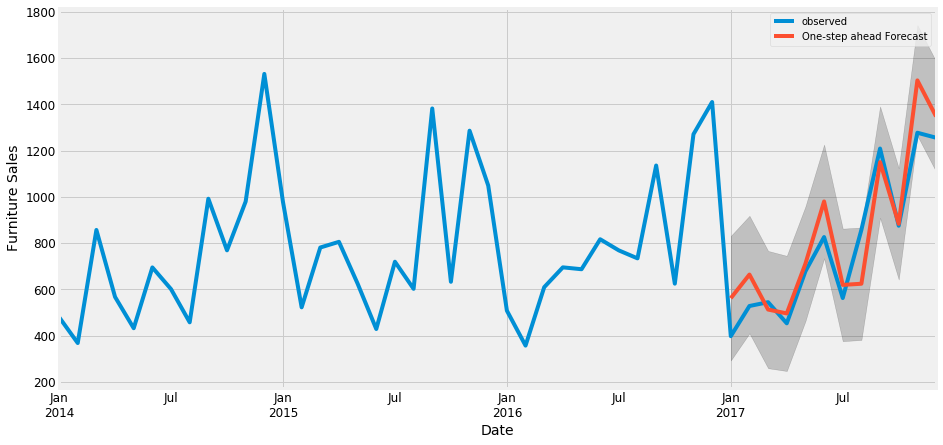

In [28]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [22]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
rmse = round(np.sqrt(mse),2)

In [23]:
print (rmse)

151.64
